# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("adult_with_headers.csv")

In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Numerical and categorical split

In [6]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']

In [7]:
numerical_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [8]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [9]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

### Data Visualization

### Histogram

In [10]:
def create_histograms(data, features, figsize=(20, 12)):
    """
    Plots histograms with KDE (Kernel Density Estimation) for the given numerical features.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot.
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).
    
    Returns:
        None: Displays the histograms with KDE.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.histplot(data=data, x=feature, kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} Distribution', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.legend(fontsize=10)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

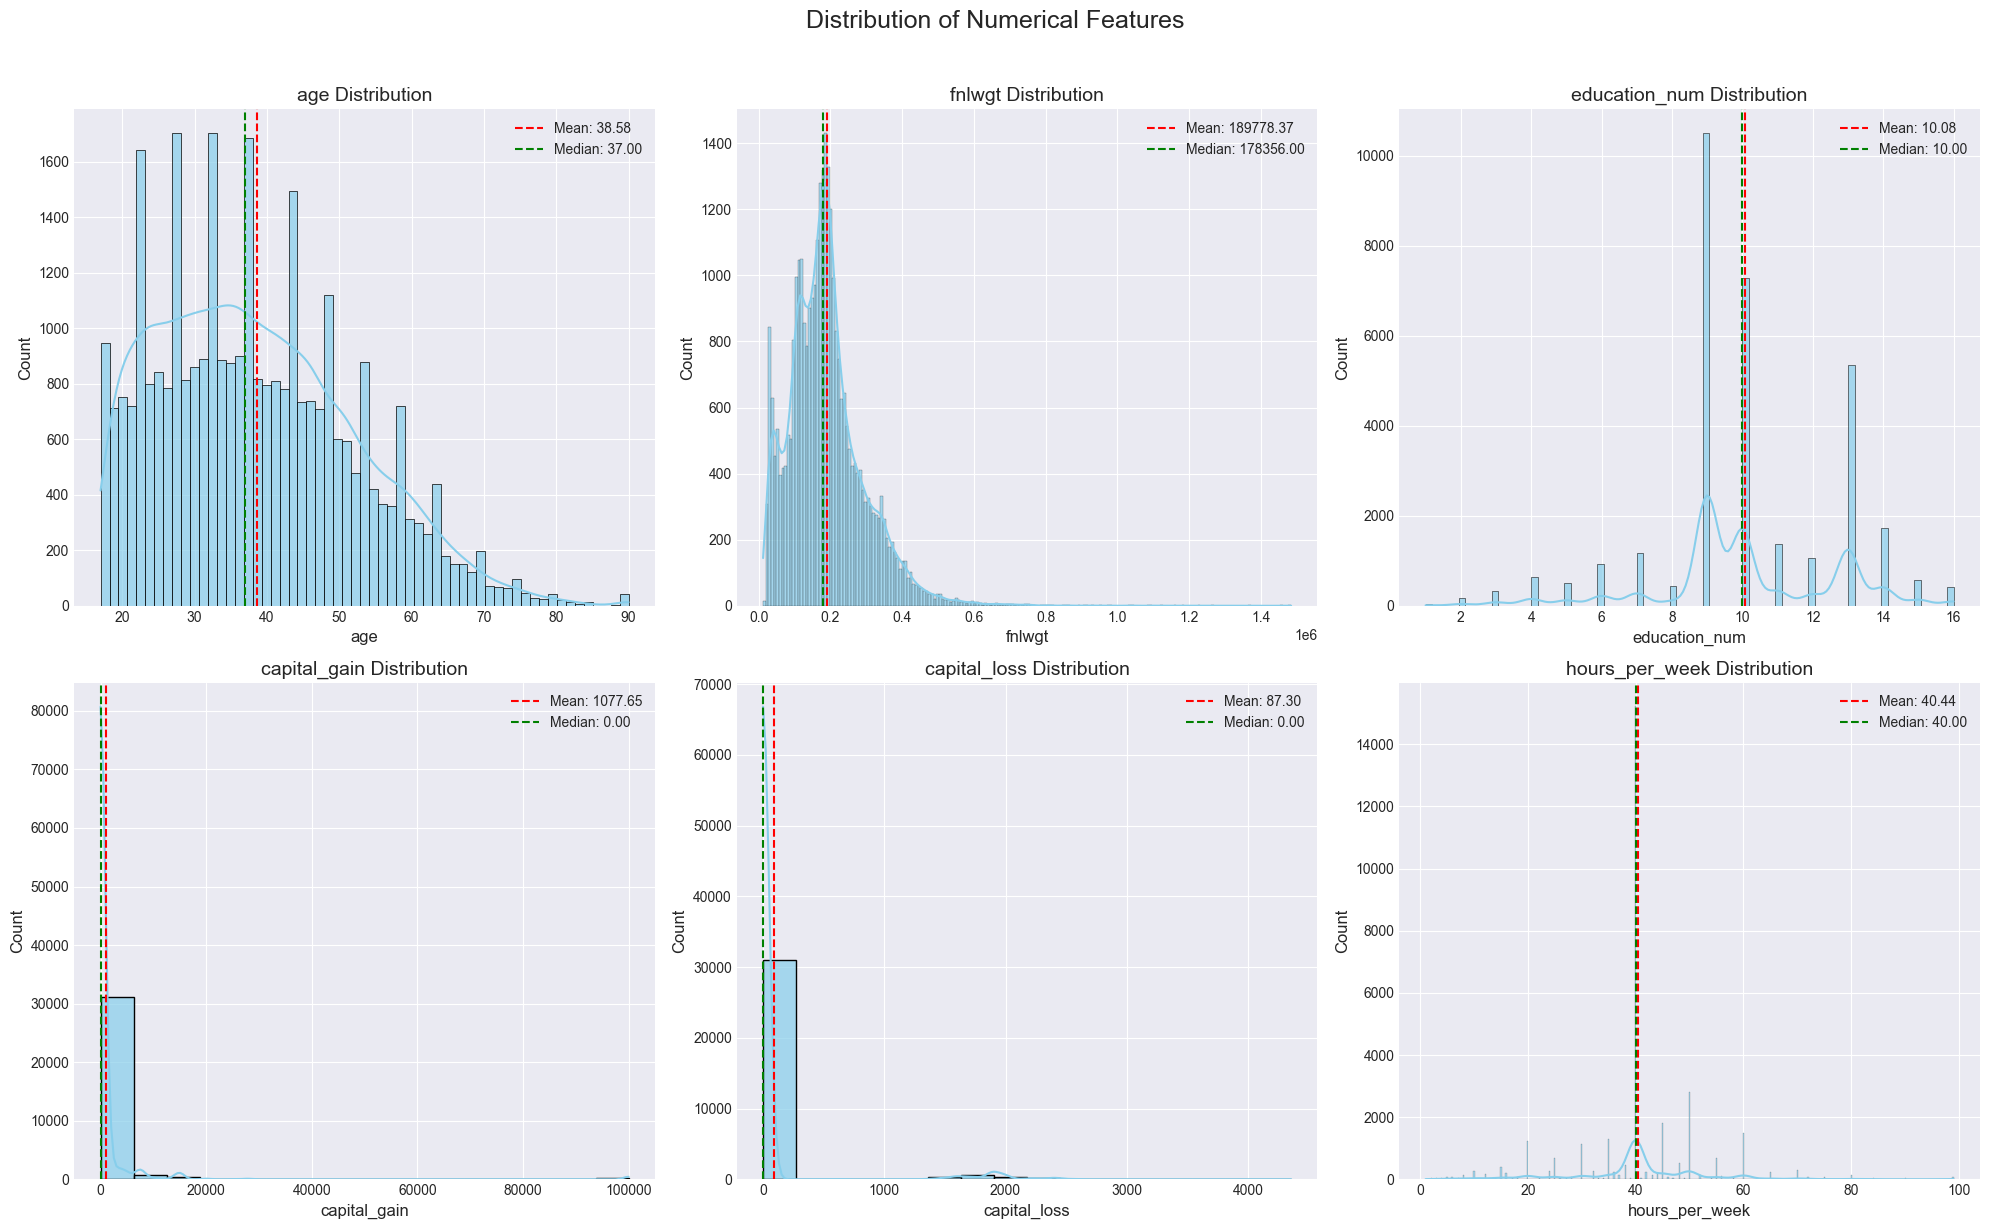

In [11]:
create_histograms(data= data,features= numerical_features)

### Box Plot

In [12]:
def create_box_plots(data, features, figsize=(20, 12)):
    """
    Plots box plots for the given numerical features to visualize their distributions and outliers.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot.
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).
    
    Returns:
        None: Displays the box plots.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Box Plots of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.boxplot(data=data, x=feature, ax=ax, color='skyblue', linewidth=1)
        ax.set_title(f'{feature} Box Plot', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

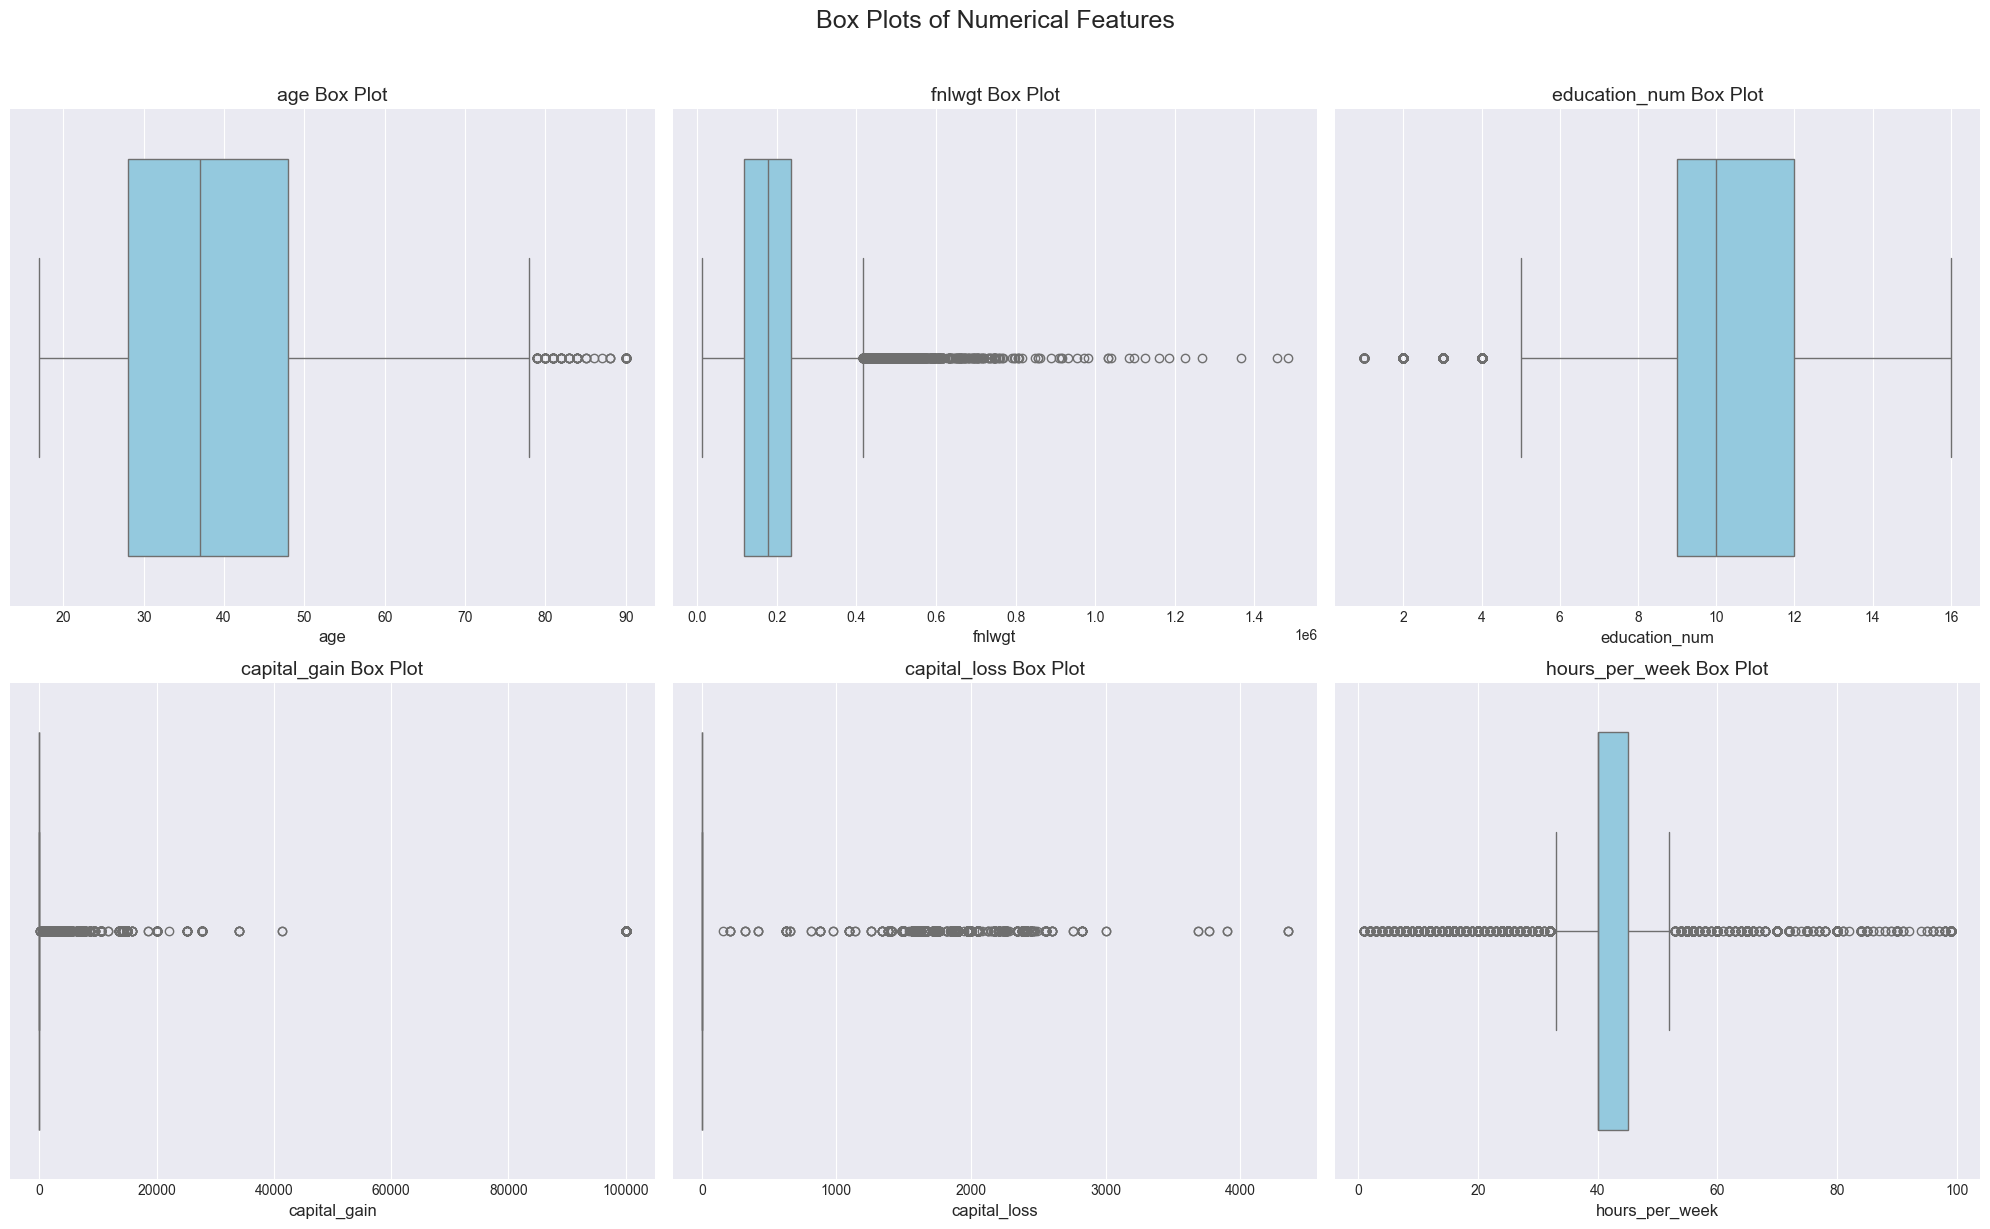

In [13]:
create_box_plots(data= data, features= numerical_features)

### Heatmap

In [14]:
def create_correlation_heatmap(data, features, figsize=(12, 10)):
    """
    Plots a correlation heatmap for the given numerical features to identify relationships between them.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to include in the heatmap.
        figsize (tuple): Figure size for the heatmap (default is (12, 10)).
    
    Returns:
        None: Displays the correlation heatmap.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    corr_matrix = data[features].corr()
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(
        corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
        square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10}
    )
    plt.title('Correlation Heatmap of Numerical Features', fontsize=18, pad=20)

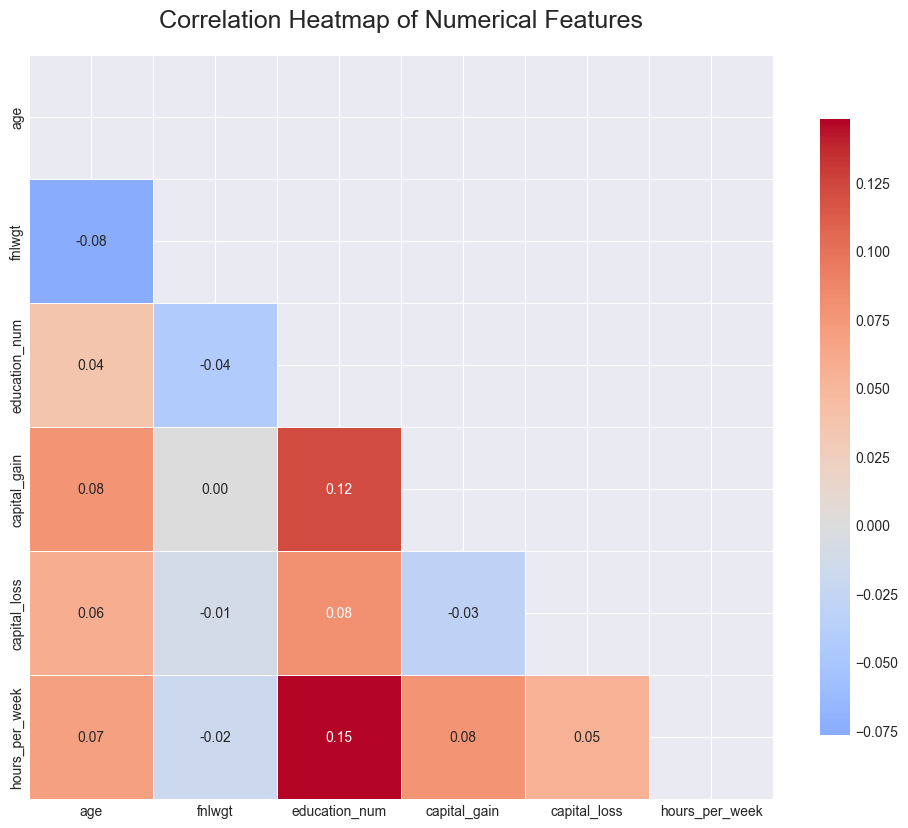

In [15]:
create_correlation_heatmap(data= data, features= numerical_features)

### Pair Plot

In [16]:
def create_pair_plot(data, features, hue=None):
    """
    Plots pair plots for the given numerical features to visualize pairwise relationships.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to include in the pair plot.
        hue (str): Column name for grouping data points by color (default is None).
    
    Returns:
        None: Displays the pair plots.
    """
    sns.pairplot(data=data[features + ([hue] if hue else [])], hue=hue, palette='tab10')
    plt.suptitle('Pair Plot of Numerical Features', fontsize=18, y=1.02)

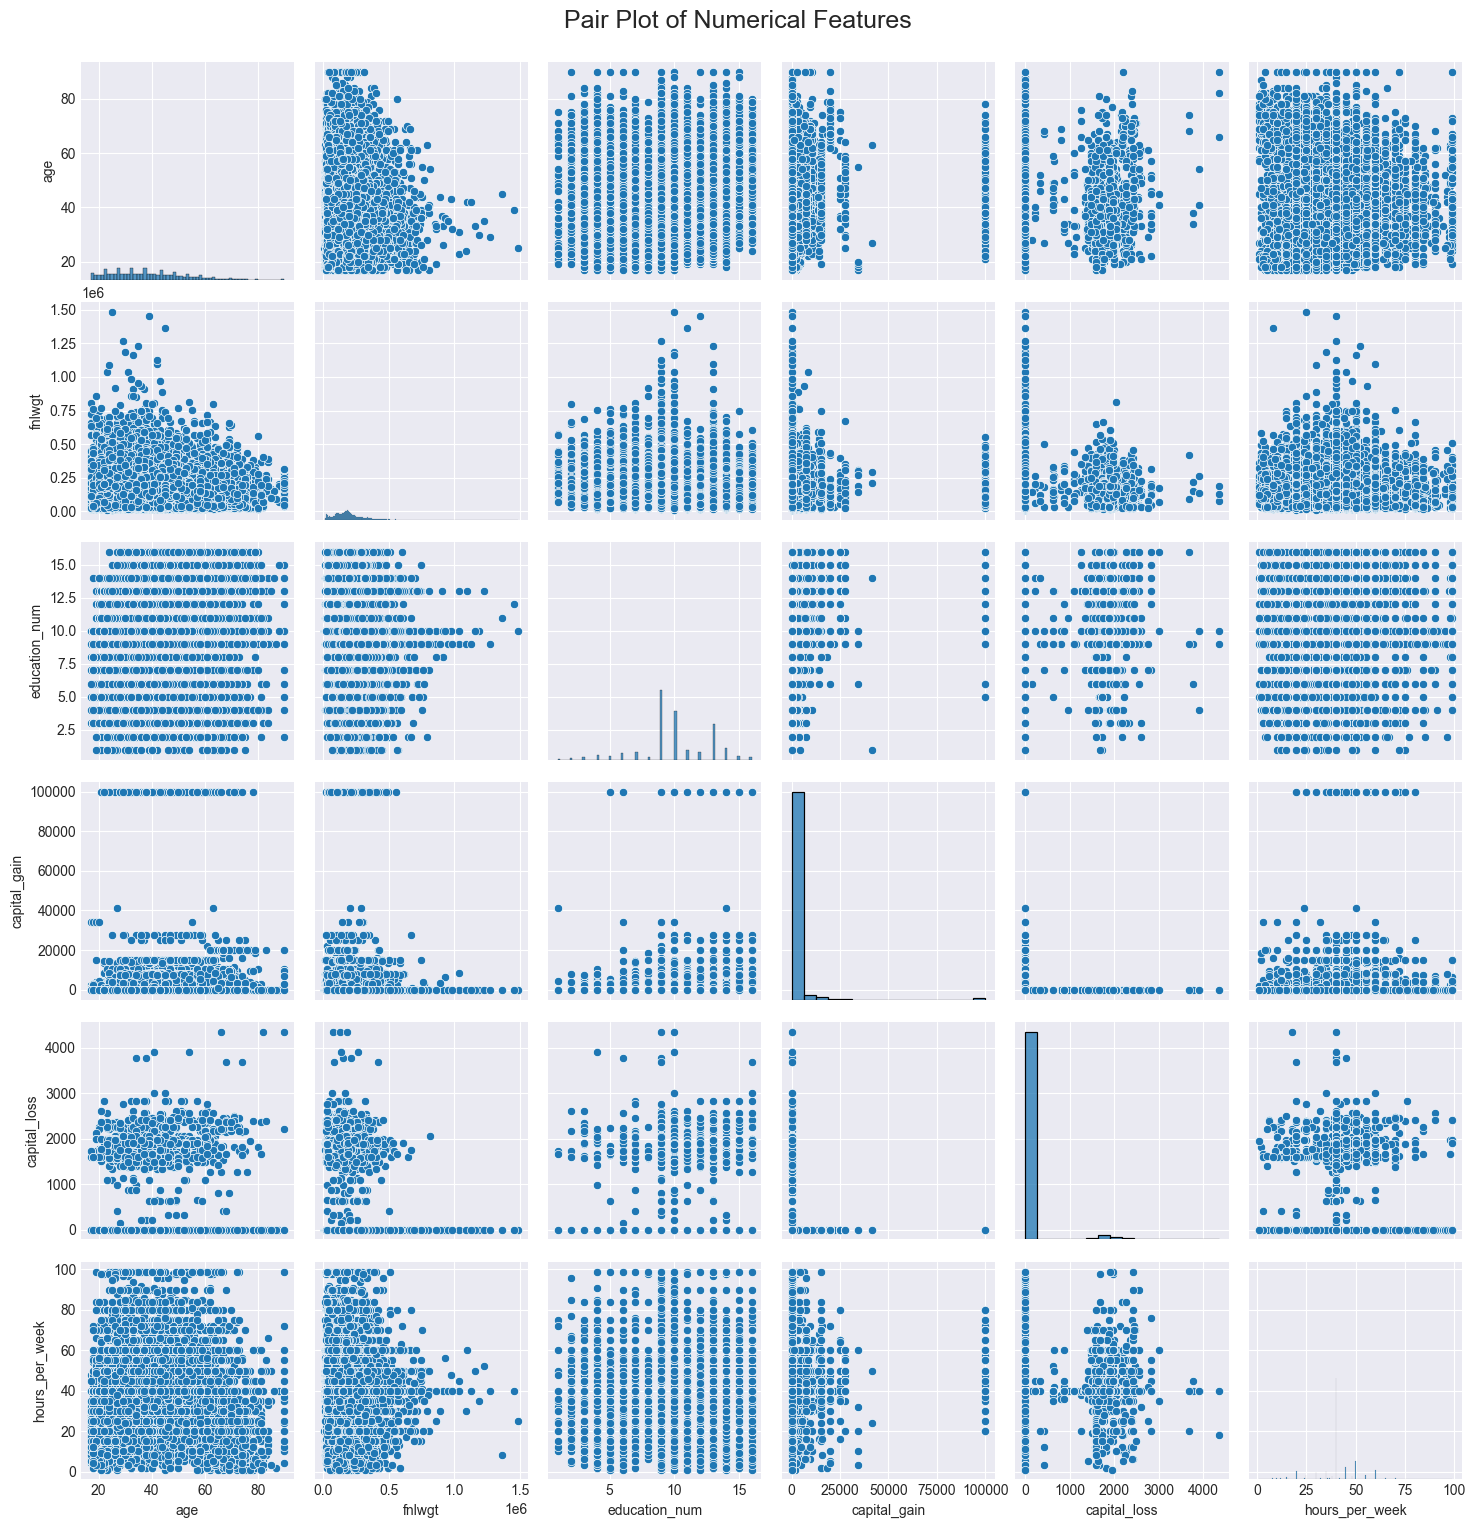

In [17]:
create_pair_plot(data,features=numerical_features)

### Bar plot

In [18]:
def plot_bar_graphs(data, features, n_cols=2, figsize=(20, 30)):
    """
    Generate bar graphs for categorical features.

    Parameters:
        data (DataFrame): The input DataFrame containing categorical features.
        features (list): List of categorical features to plot.
        n_cols (int): Number of columns in the plot grid.
        figsize (tuple): Overall figure size for the plots.

    Returns:
        None
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Bar Graphs of Categorical Features', fontsize=18, y=1.02)

    axes = axes.flatten()
    for idx, feature in enumerate(features):
        sns.countplot(data=data, x=feature, palette='viridis', ax=axes[idx], order=data[feature].value_counts().index)
        axes[idx].set_title(f'{feature} Bar Plot', fontsize=14)
        axes[idx].set_xlabel(feature, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=45)

    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

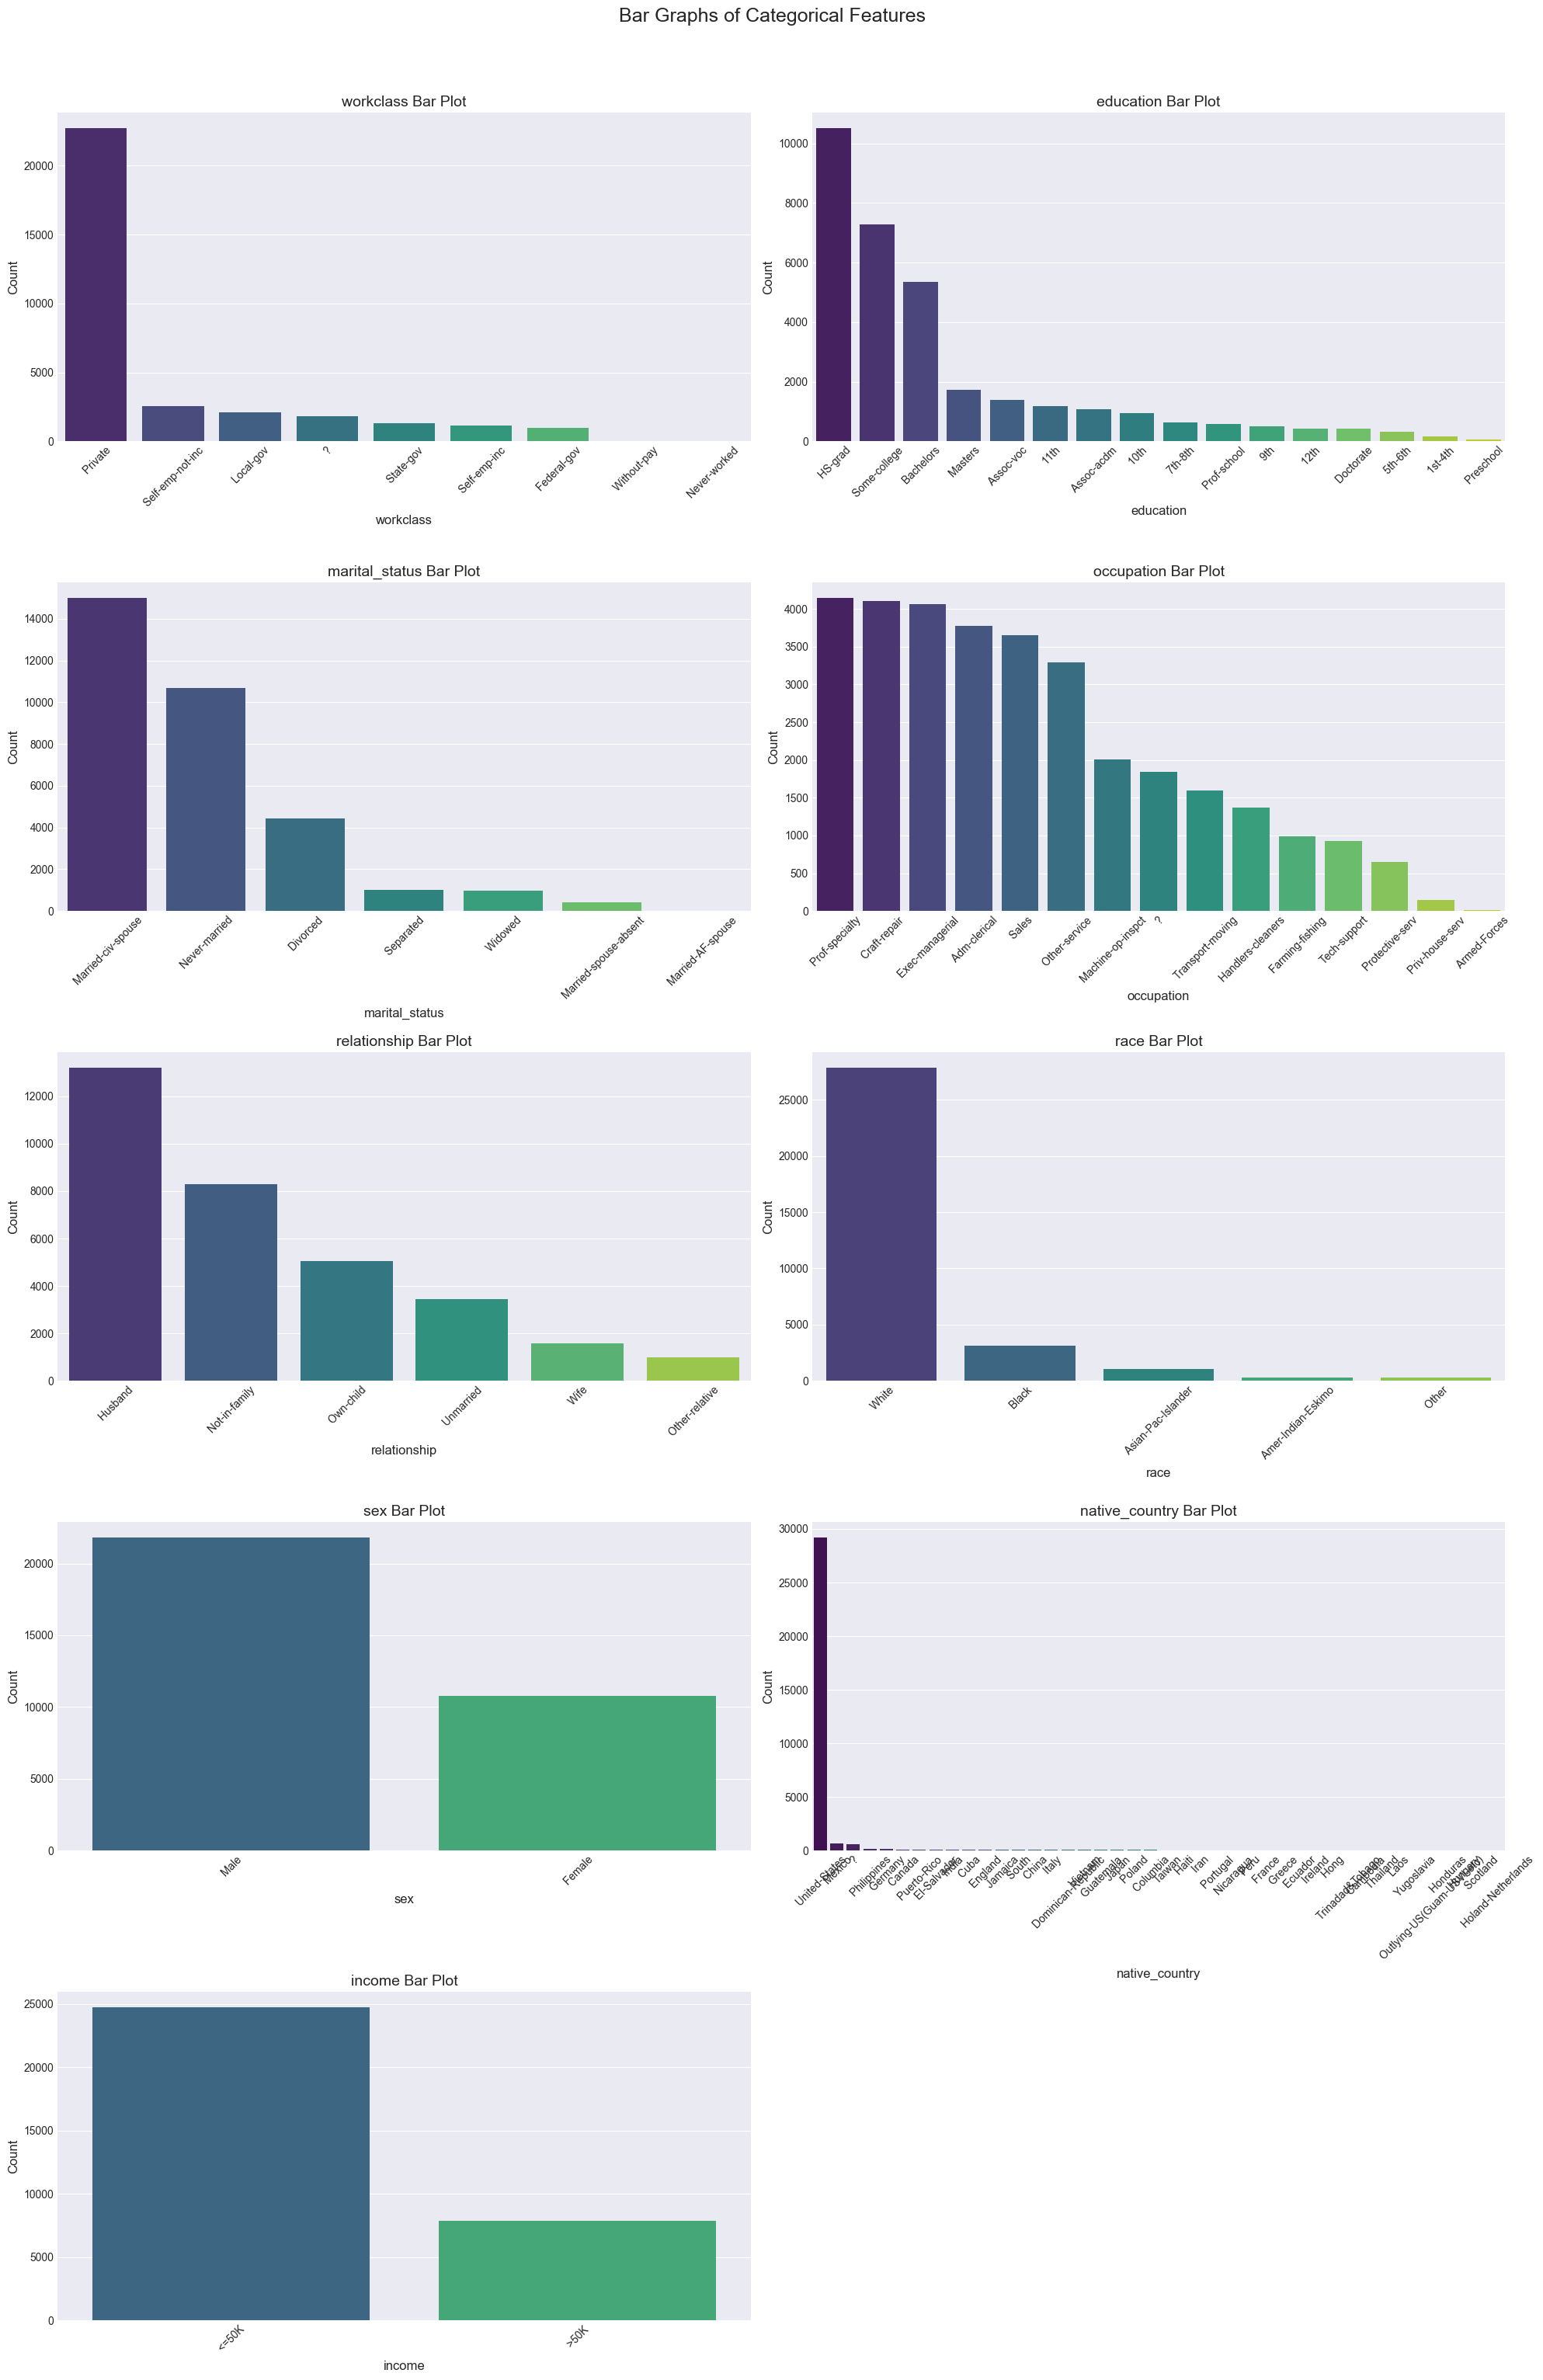

In [19]:
plot_bar_graphs(data= data, features= categorical_features)

### Stacked bar graph

In [20]:
def plot_stacked_bar_graphs(data, features, target_feature, n_cols=2, figsize=(20, 35)):
    """
    Generate stacked bar graphs for multiple categorical features against a target feature.

    Parameters:
        data (DataFrame): The input DataFrame containing categorical features.
        features (list): List of categorical features to plot.
        target_feature (str): The target categorical feature for stacking.
        n_cols (int): Number of columns in the plot grid.
        figsize (tuple): Overall figure size for the plots.

    Returns:
        None
    """
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle(f'Stacked Bar Graphs against {target_feature}', fontsize=18, y=1.02)

    axes = axes.flatten()
    for idx, feature in enumerate(features):
        stacked_data = data.groupby([feature, target_feature]).size().unstack(fill_value=0)
        stacked_data.plot(kind='bar', stacked=True, ax=axes[idx], colormap='viridis', alpha=0.8)
        axes[idx].set_title(f'{feature} vs {target_feature}', fontsize=14)
        axes[idx].set_xlabel(feature, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)

    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

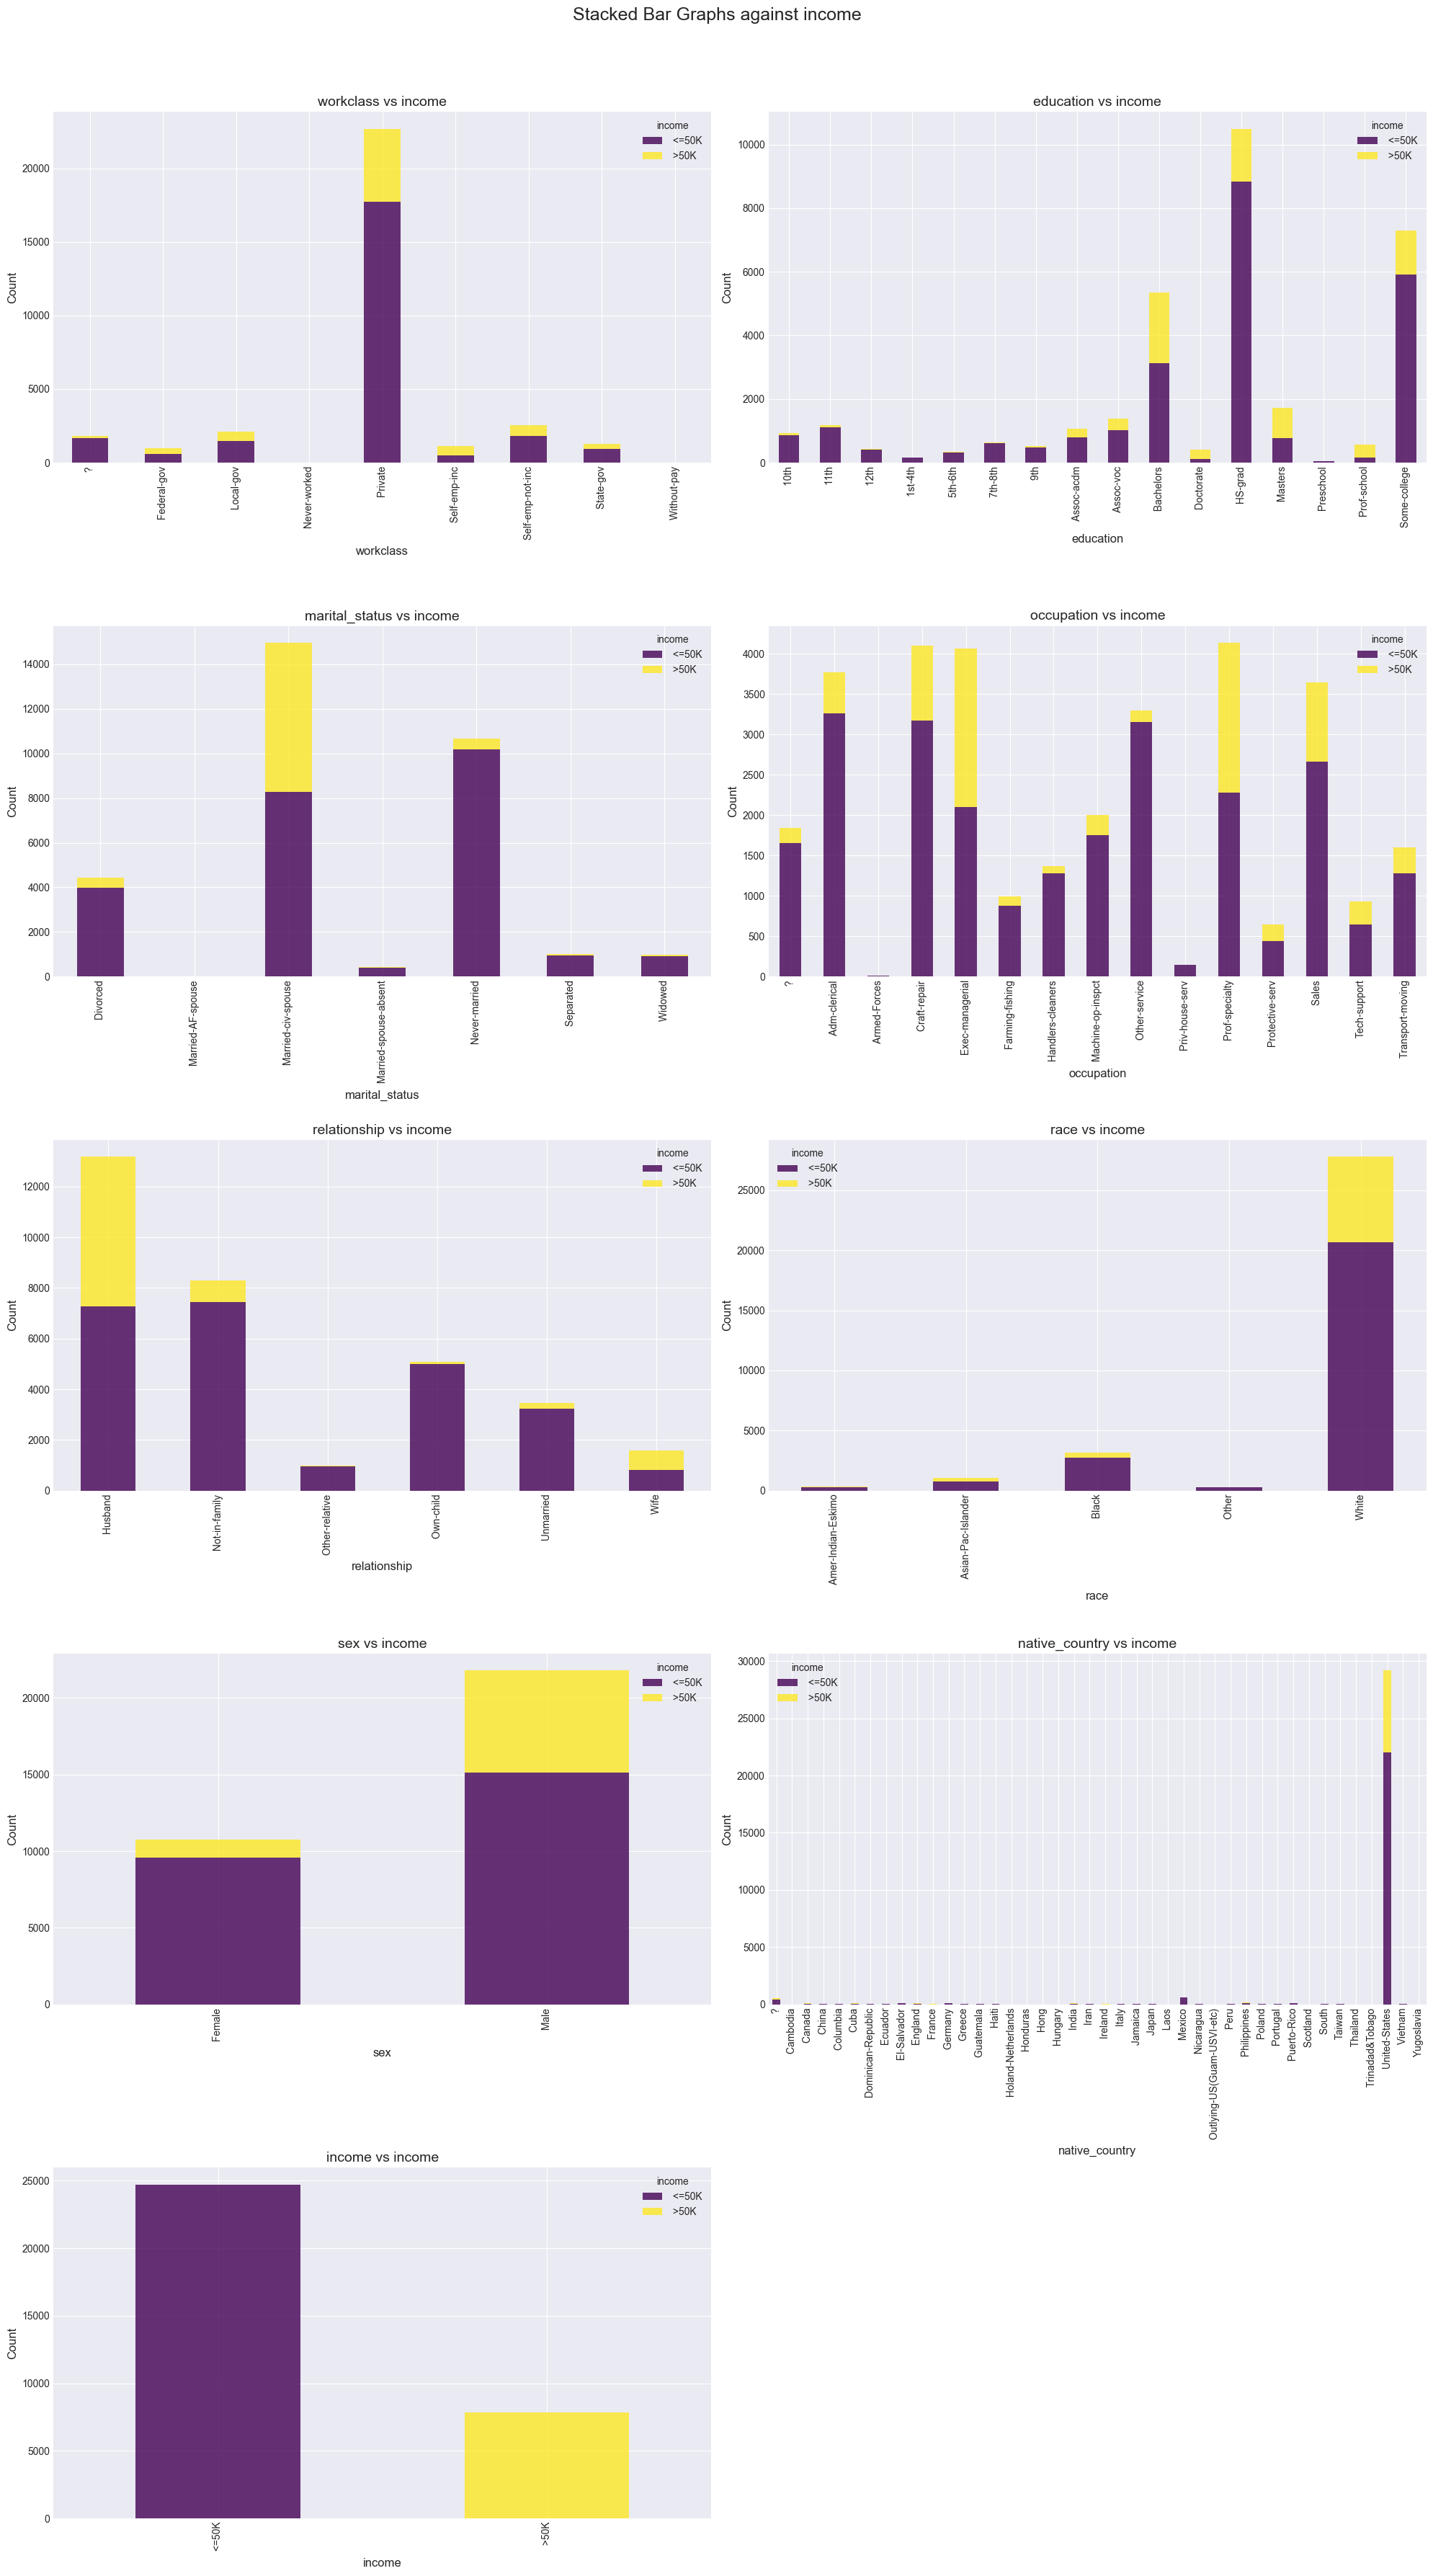

In [21]:
plot_stacked_bar_graphs(data= data, features= categorical_features, target_feature= 'income')

### Heatmap

In [22]:
def plot_heatmaps(data, features, class_feature, n_cols=2, figsize=(20, 30)):
    """
    Generate heatmaps for categorical features with respect to a class variable.

    Parameters:
        data (DataFrame): The input DataFrame containing categorical features.
        features (list): List of categorical features to plot.
        class_feature (str): The class variable to compare against.
        n_cols (int): Number of columns in the plot grid.
        figsize (tuple): Overall figure size for the plots.

    Returns:
        None
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Heatmaps of Categorical Features with Respect to Class', fontsize=18, y=1.02)

    axes = axes.flatten()
    for idx, feature in enumerate(features):
        heatmap_data = pd.crosstab(index=data[feature], columns=data[class_feature])
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=0.5, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs {class_feature}', fontsize=14)
        axes[idx].set_xlabel(class_feature, fontsize=12)
        axes[idx].set_ylabel(feature, fontsize=12)

    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

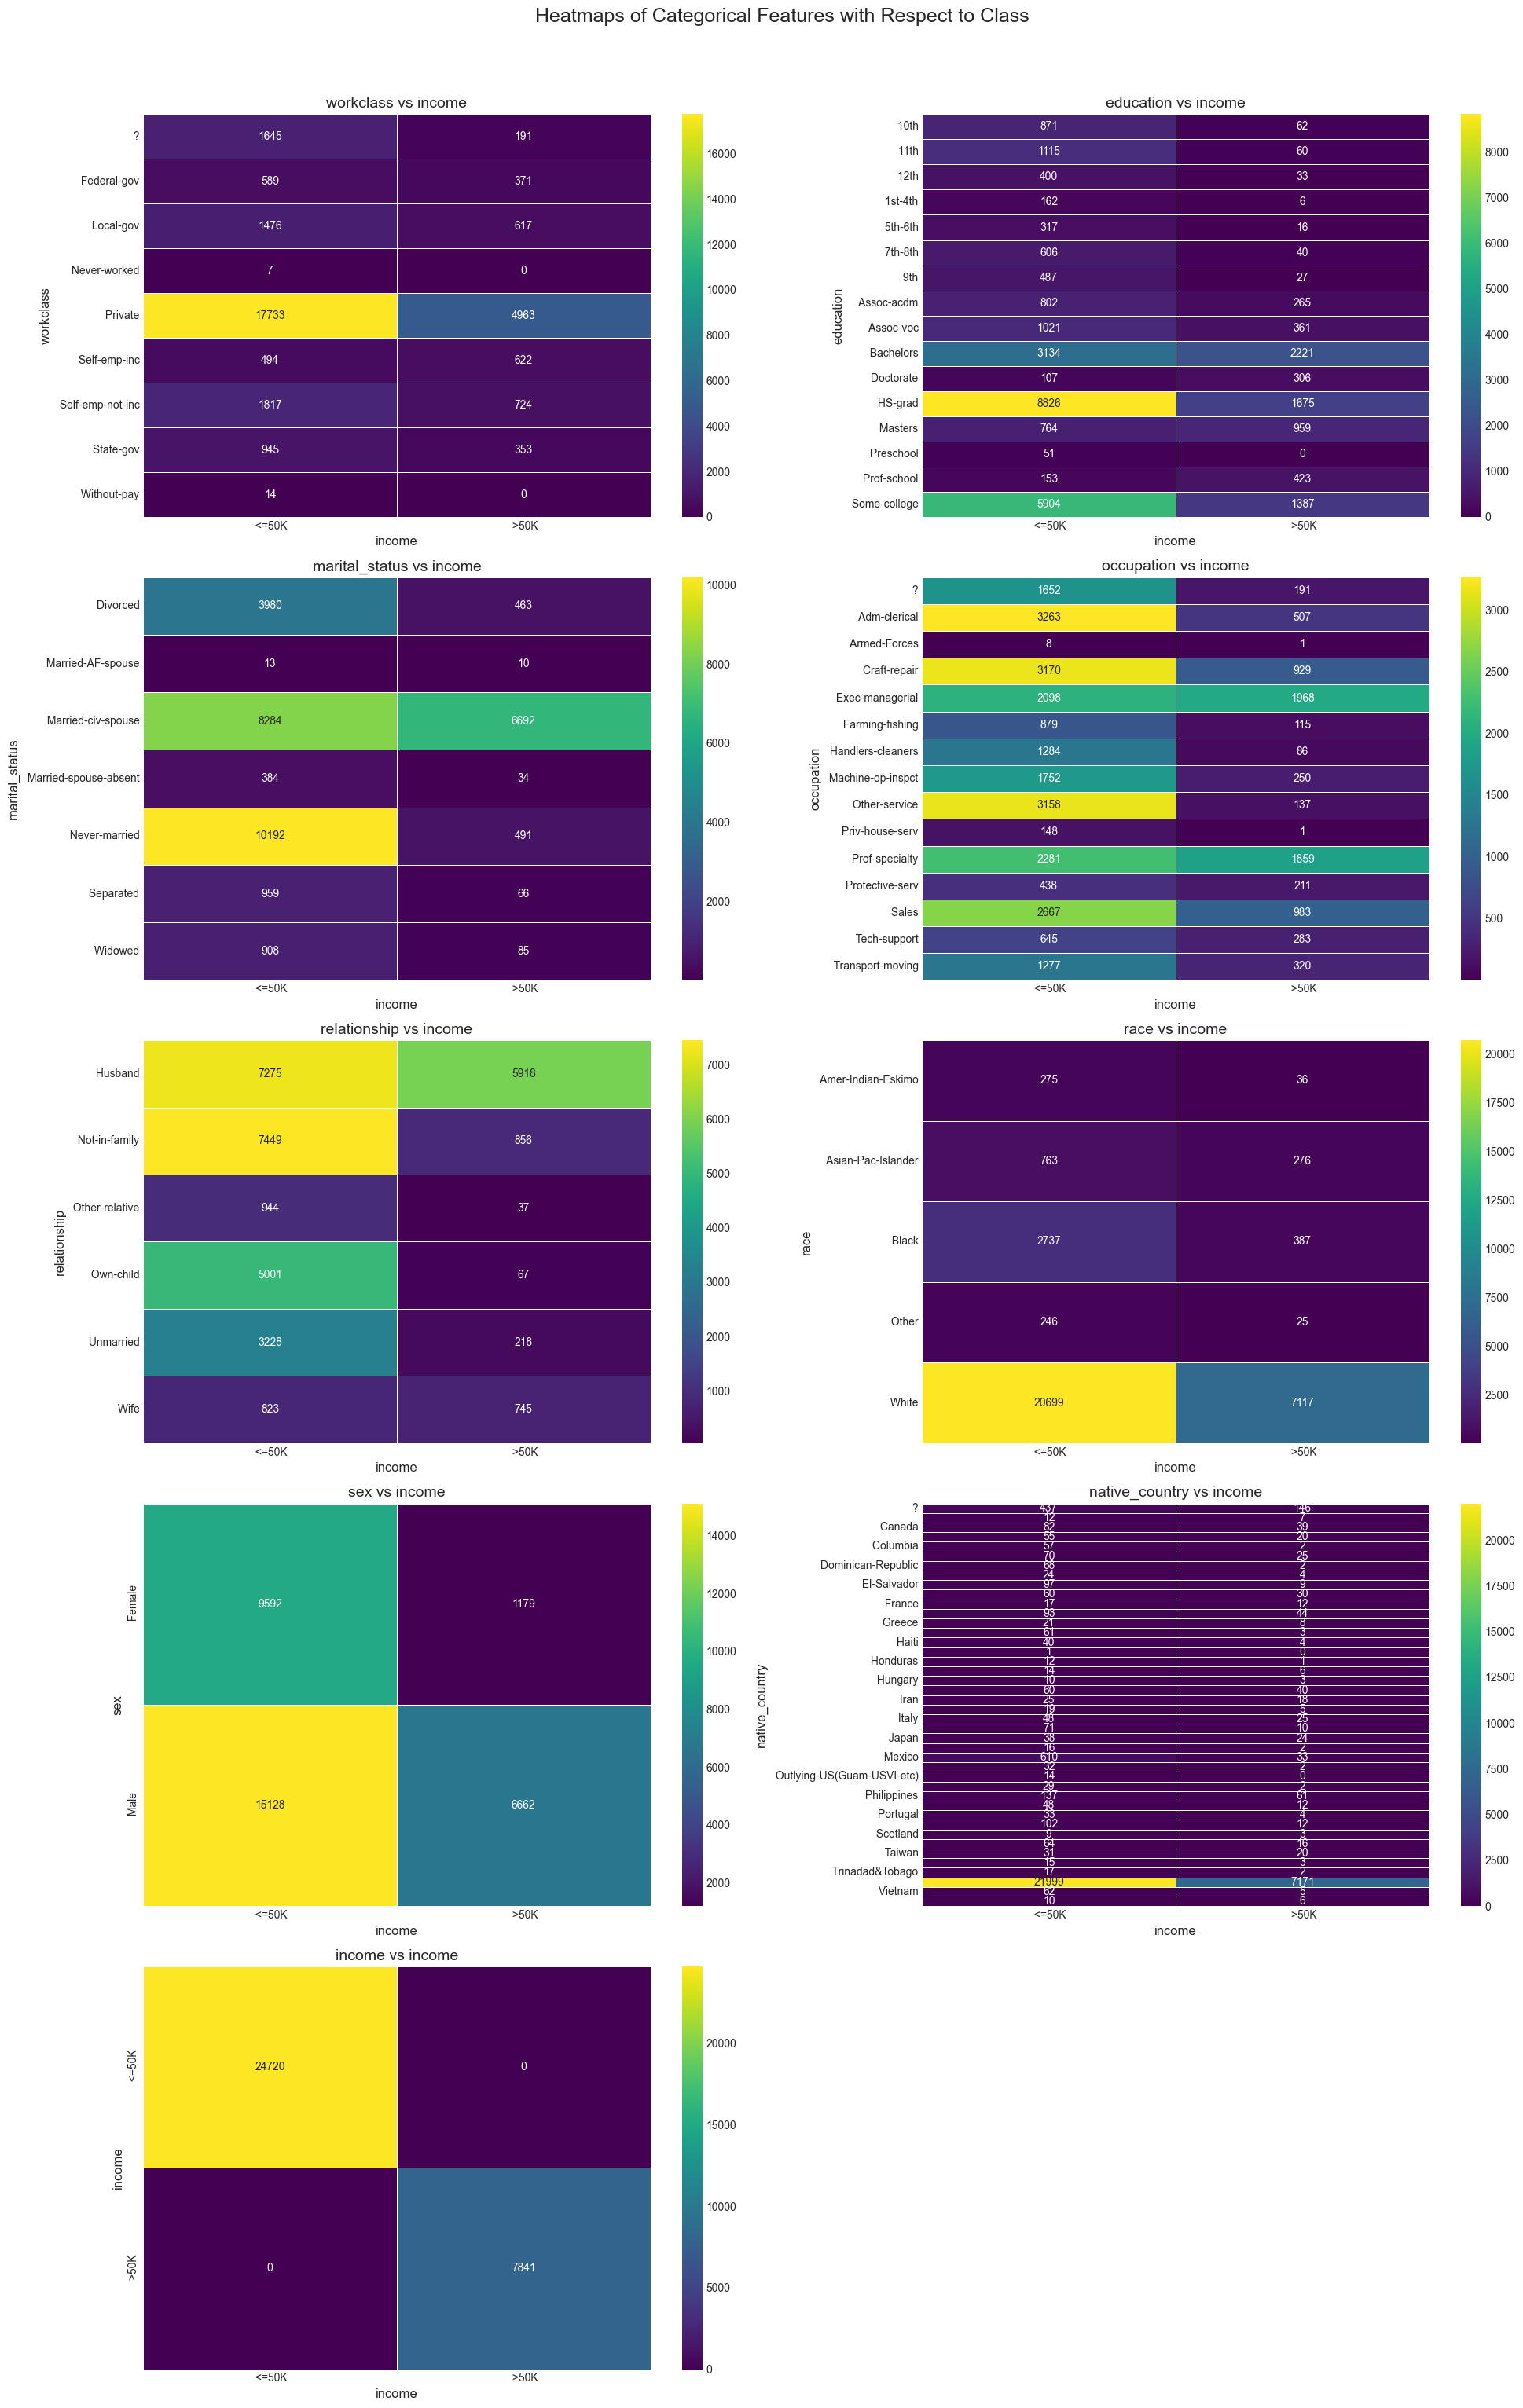

In [23]:
plot_heatmaps(data= data, features= categorical_features, class_feature= 'income')

### Pie chart

In [24]:
def plot_pie_charts(data, features, n_cols=2, figsize=(20, 30)):
    """
    Generate pie charts for multiple categorical features.

    Parameters:
        data (DataFrame): The input DataFrame containing categorical features.
        features (list): List of categorical features to plot.
        n_cols (int): Number of columns in the plot grid.
        figsize (tuple): Overall figure size for the plots.

    Returns:
        None
    """
    n_features = len(features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Pie Charts of Categorical Features', fontsize=18, y=1.02)

    axes = axes.flatten()
    for idx, feature in enumerate(features):
        feature_counts = data[feature].value_counts()
        axes[idx].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', 
                      colors=sns.color_palette('viridis', len(feature_counts)), startangle=90)
        axes[idx].set_title(f'{feature} Pie Chart', fontsize=14)

    for idx in range(n_features, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

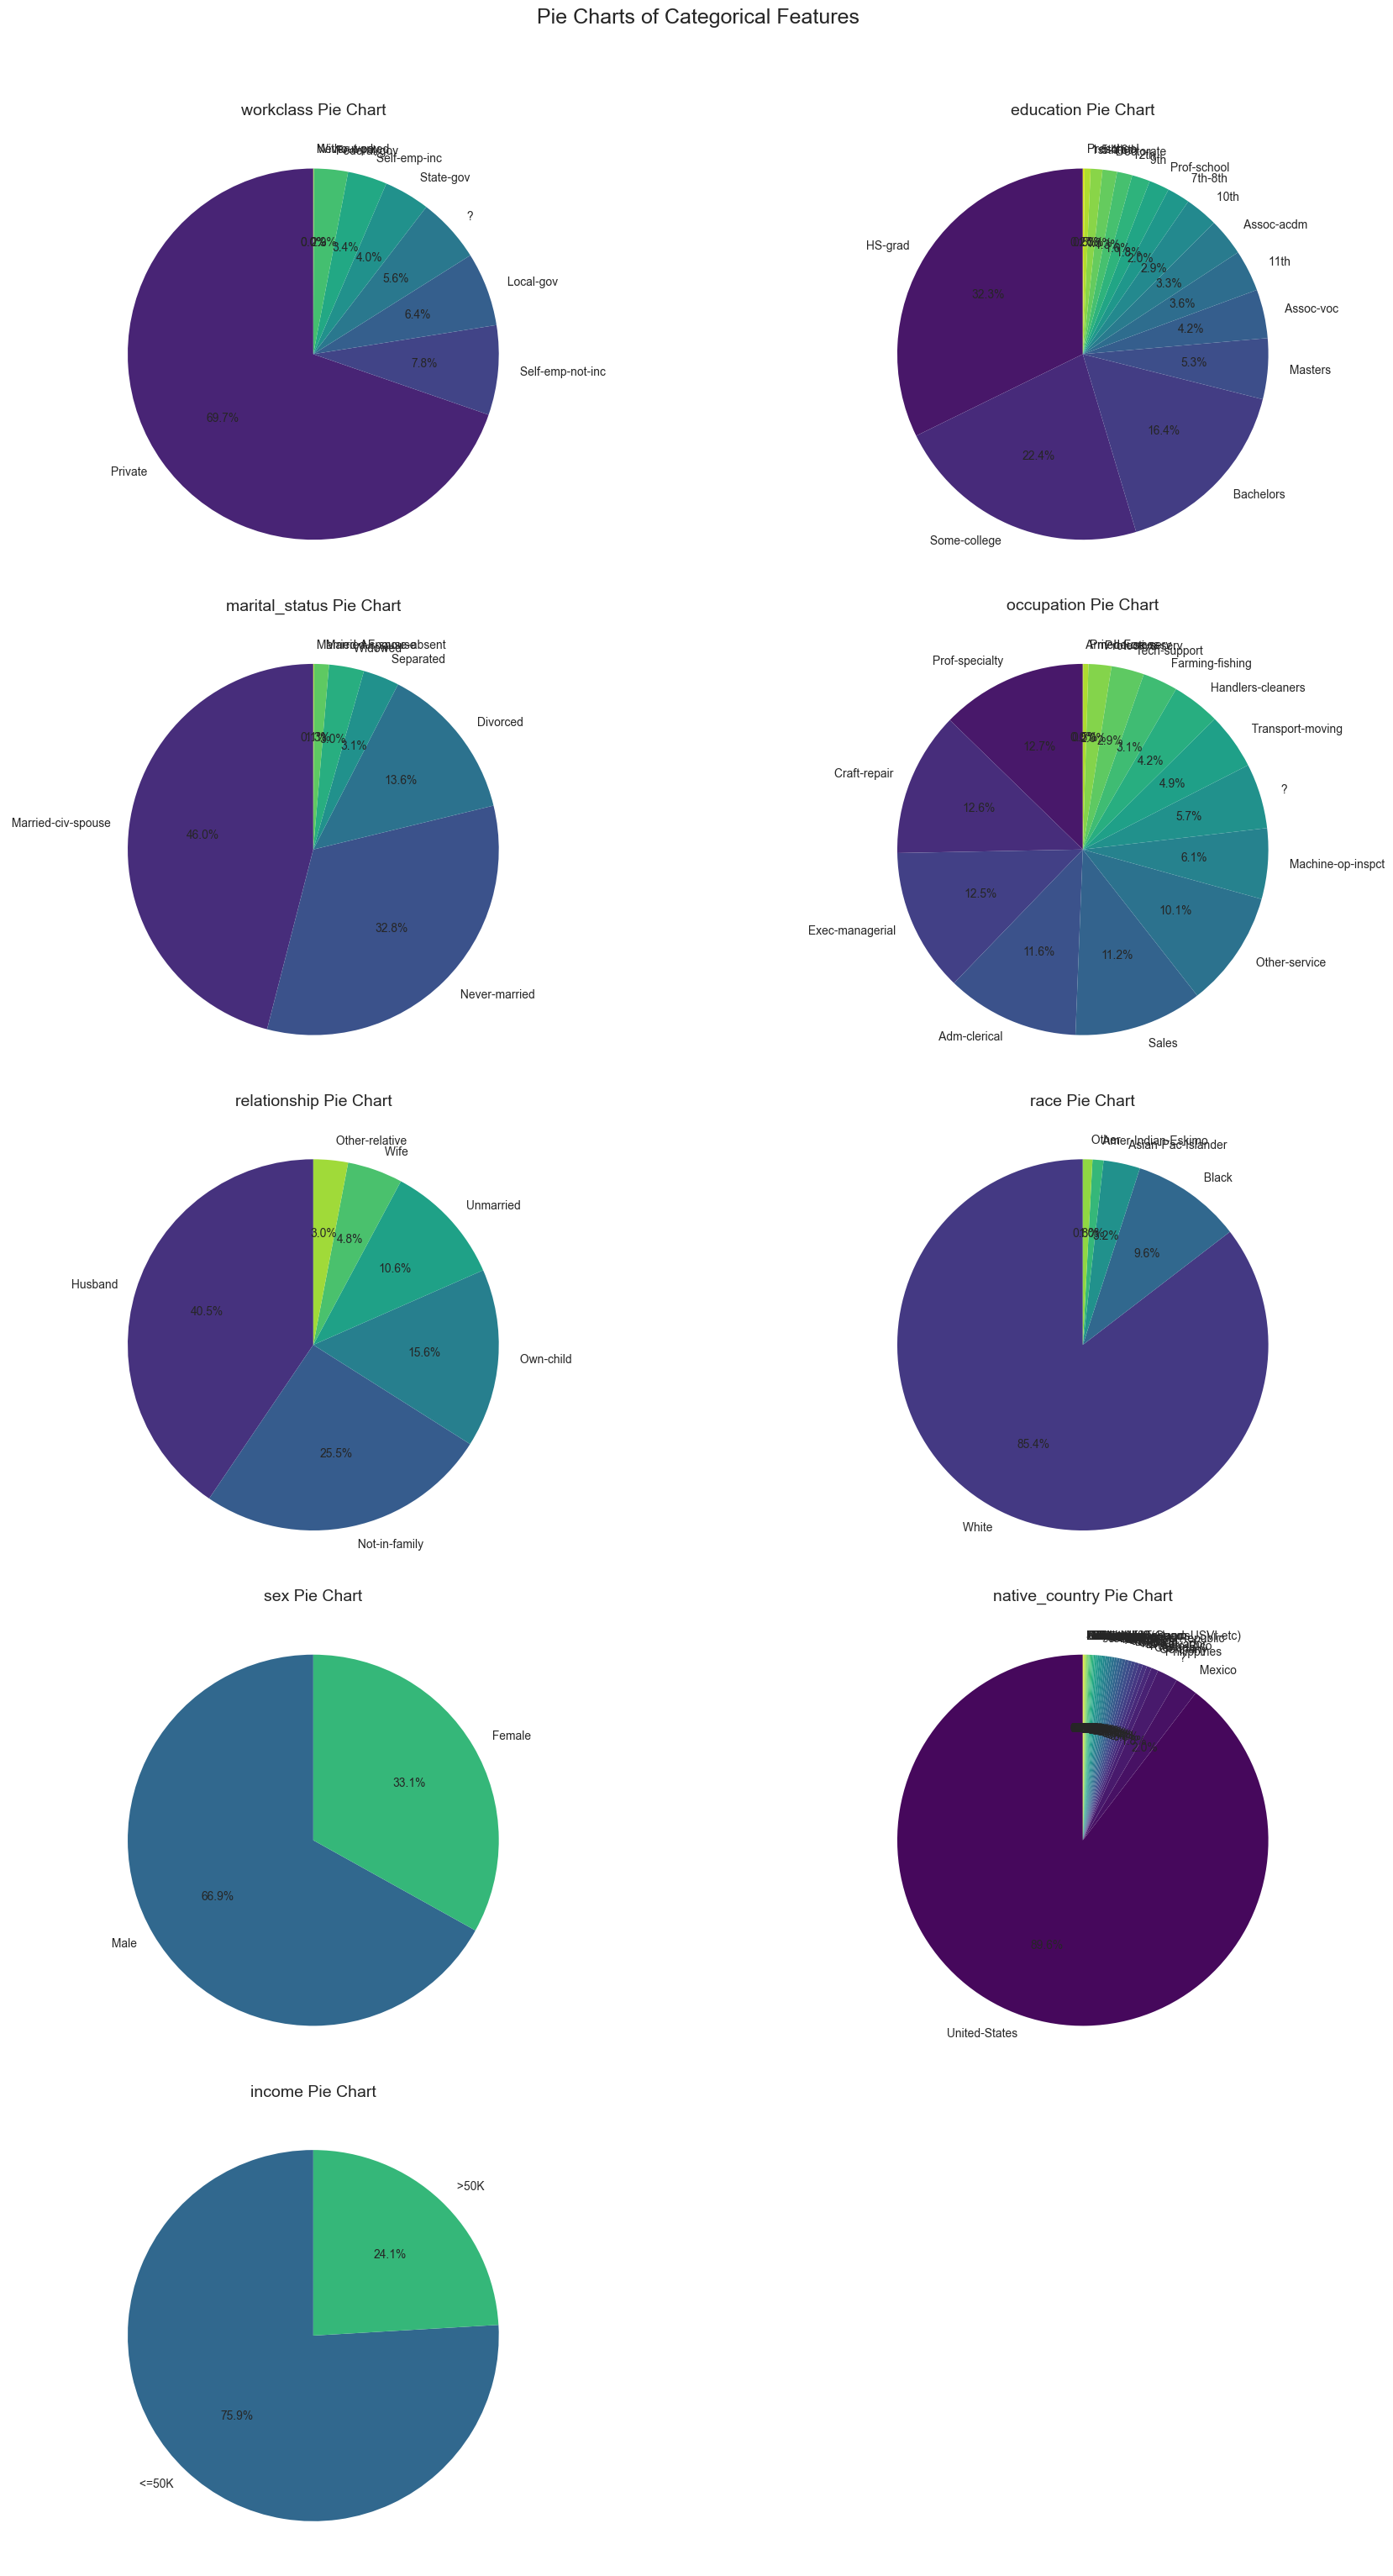

In [25]:
plot_pie_charts(data= data, features= categorical_features)

In [26]:
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
def scale_numerical_features(df, columns, method='standard'):
    """
    Apply scaling to numerical features using the specified method.

    Args:
        df (pd.DataFrame): The dataframe containing numerical features to scale.
        columns (list): List of numerical column names to scale.
        method (str): Scaling method, 'standard' for Standard Scaling or 'minmax' for Min-Max Scaling.

    Returns:
        pd.DataFrame: Dataframe with scaled numerical features.
    """
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid method. Use 'standard' or 'minmax'.")

    df[columns] = scaler.fit_transform(df[columns])
    return df

#### Standard Scaling

In [29]:
std_data = data.copy()

In [30]:
std_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [31]:
std_data = scale_numerical_features(df= std_data,
                                    columns= numerical_features, 
                                    method= "standard")

In [32]:
std_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


#### MinMaxScaling

In [33]:
minMax_data = data.copy()

In [34]:
minMax_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
minMax_data = scale_numerical_features(df= minMax_data,
                                       columns= numerical_features,
                                       method= 'minmax')

In [36]:
minMax_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


## Scenarios for Scaling Techniques

### 1. **Standard Scaling** (Z-Score Normalization)
   - **Scenario**: 
     - When the dataset contains numerical features with varied units or scales (e.g., income in dollars and age in years).
     - Works best for algorithms that assume data follows a Gaussian distribution or are sensitive to the mean and standard deviation of features, such as:
       - Logistic Regression
       - Support Vector Machines (SVMs)
       - Principal Component Analysis (PCA)
       - Linear Discriminant Analysis (LDA)
   - **Why**:
     - Standard Scaling centers the data around the mean with a standard deviation of 1. This makes features comparable without altering their variance significantly.

### 2. **Min-Max Scaling** (Normalization)
   - **Scenario**:
     - When the dataset requires all features to be in a specific range (e.g., [0, 1] or [-1, 1]).
     - Commonly used when:
       - The algorithm does not assume a Gaussian distribution, such as K-Nearest Neighbors (KNN) or Neural Networks.
       - Features need to be bounded, such as pixel intensity values in image processing.
   - **Why**:
     - Min-Max Scaling compresses all values into a fixed range, preserving the relative distances between data points. It ensures no feature dominates due to its scale.

### Key Differences:

| **Feature**            | **Standard Scaling**                          | **Min-Max Scaling**                              |
|------------------------|-----------------------------------------------|-------------------------------------------------|
| **Effect on Distribution** | Maintains the shape of the original distribution. | Compresses data into the specified range.       |
| **Sensitivity to Outliers** | Less sensitive to outliers but does not remove them. | Highly sensitive to outliers.                  |
| **Range of Values**       | No fixed range, mean = 0, std dev = 1.         | Transforms data to the range [0, 1] (or custom).|
| **Preferred Algorithms**  | SVM, PCA, Logistic Regression.               | Neural Networks, KNN, Image Processing.        |


### Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
def one_hot_encode(df, column):
    """
    Apply One-Hot Encoding to the specified column in the dataframe.

    Args:
        df (pd.DataFrame): The dataframe containing the column to encode.
        column (str): The column name to apply one-hot encoding.

    Returns:
        pd.DataFrame: Dataframe with one-hot encoded columns added and the original column dropped.
    """
    one_hot = pd.get_dummies(df[column], prefix=column, dtype= int)
    df = pd.concat([df, one_hot], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [39]:
def label_encode(df, column):
    """
    Apply Label Encoding to the specified column in the dataframe.

    Args:
        df (pd.DataFrame): The dataframe containing the column to encode.
        column (str): The column name to apply label encoding.

    Returns:
        pd.DataFrame: Dataframe with the label-encoded column replacing the original column.
    """
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [40]:
def encode_categorical_columns(df, categorical_columns):
    """
    Encode categorical columns in the dataframe based on the number of unique categories:
    - Use One-Hot Encoding for columns with fewer than 5 unique categories.
    - Use Label Encoding for columns with 5 or more unique categories.

    Args:
        df (pd.DataFrame): The dataframe to process.

    Returns:
        pd.DataFrame: Dataframe with encoded categorical columns.
    """
    for column in categorical_columns:
        unique_count = df[column].nunique()
        if unique_count < 5:
            df = one_hot_encode(df, column)
        else:
            df = label_encode(df, column)
    
    return df

In [41]:
data = encode_categorical_columns(df= data, categorical_columns= categorical_features)

In [42]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0


## Pros and Cons of One-Hot Encoding and Label Encoding

### Key Differences:

| **Aspect**              | **One-Hot Encoding**                                                                 | **Label Encoding**                                                         |
|-------------------------|--------------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Dimensionality**      | High-dimensional, increases the number of features.                                  | Low-dimensional, retains the same number of features.                     |
| **Interpretability**    | Easy to interpret; each category is represented as a separate column.                | Difficult to interpret; numerical values may not have intrinsic meaning.   |
| **Ordinal Assumptions** | No assumptions of order between categories, suitable for nominal data.               | Assumes ordinal relationships, which may mislead some algorithms.         |
| **Algorithm Suitability**| Works well with tree-based models and algorithms that can handle sparse matrices.   | May bias linear or distance-based models due to imposed numerical order.  |
| **Memory Usage**        | Requires more memory and computation for high-cardinality features.                  | Memory-efficient and computationally light.                               |
| **Outlier Handling**    | Not applicable; treats all categories equally.                                       | Sensitive to the relative difference between numerical encodings.          |
---

### Feature Engineering

## Feature Creation

### **Capital Income**

**Rationale**: The dataset already contains the numerical features `capital_gain` and `capital_loss`. These features individually represent gains and losses from capital, respectively. By combining them into a single feature, `capital_income`, calculated as:

```python
capital_income = capital_gain - capital_loss
```

we can create a consolidated measure of net capital income for an individual. This new feature simplifies the dataset, reduces redundancy, and might better capture the financial status of an individual, which could be a significant factor in predicting the target variable (e.g., income levels). 

**Advantages**:
- **Reduces Dimensionality**: Instead of using two separate features, a single consolidated feature can be utilized.
- **Improves Interpretability**: Provides a clear understanding of net capital impact (gain or loss).
- **Increases Predictive Power**: By combining the two related features, we potentially enhance their contribution to model performance.

### **Work Hours Category**

**Rationale**: The `hours_per_week` column is a numerical feature representing the number of hours an individual works in a week. While it provides detailed information, grouping these values into categorical groups (e.g., `Full-time`, `Part-time`, `Overtime`) can help the model capture patterns more effectively, especially for algorithms that handle categorical variables well.

The categories are defined as:
- **Part-time**: Individuals working less than 35 hours per week.
- **Full-time**: Individuals working between 35 and 40 hours per week (inclusive).
- **Overtime**: Individuals working more than 40 hours per week.

This transformation allows the model to better distinguish between different working schedules, which might correlate with income levels or other factors.

**Advantages**:
- **Simplifies Interpretation**: Groups numerical data into intuitive categories that are easier to analyze.
- **Enhances Pattern Recognition**: Helps models identify trends related to work hours without being overly granular.
- **Supports Decision Trees**: Categorical features often improve performance in tree-based models.

---

By creating these features, the dataset becomes more interpretable and potentially improves the model's ability to learn significant patterns.


In [43]:
featuring_data = data.copy()

In [44]:
featuring_data['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

In [45]:
featuring_data['capital_loss'].value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2467        1
2163        1
2472        1
1411        1
Name: count, Length: 92, dtype: int64

- we will create a new feature capital_income

In [46]:
featuring_data['capital_income'] = featuring_data['capital_gain'] - featuring_data['capital_loss']

In [47]:
featuring_data['capital_income'].value_counts()

capital_income
 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
-2163         1
 2387         1
-2472         1
 5060         1
-1411         1
Name: count, Length: 210, dtype: int64

- now the capital_gain and capital_loss feature are no longer required
- so we drop them

In [48]:
featuring_data.drop(['capital_gain', 'capital_loss'], axis= 1, inplace= True)

In [49]:
featuring_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_income
0,39,7,77516,9,13,4,1,1,4,40,39,0,1,1,0,2174
1,50,6,83311,9,13,2,4,0,4,13,39,0,1,1,0,0
2,38,4,215646,11,9,0,6,1,4,40,39,0,1,1,0,0
3,53,4,234721,1,7,2,6,0,2,40,39,0,1,1,0,0
4,28,4,338409,9,13,2,10,5,2,40,5,1,0,1,0,0


- we will divide the hours_per_week column into various categories (e.g., `Full-time`, `Part-time`, `Overtime`)

In [50]:
def categorize_hours(hours):
    if hours < 35:
        return 'Part-time'
    elif 35 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Overtime'

In [51]:
featuring_data['work_hours_category'] = featuring_data['hours_per_week'].apply(categorize_hours)

In [52]:
featuring_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_income,work_hours_category
0,39,7,77516,9,13,4,1,1,4,40,39,0,1,1,0,2174,Full-time
1,50,6,83311,9,13,2,4,0,4,13,39,0,1,1,0,0,Part-time
2,38,4,215646,11,9,0,6,1,4,40,39,0,1,1,0,0,Full-time
3,53,4,234721,1,7,2,6,0,2,40,39,0,1,1,0,0,Full-time
4,28,4,338409,9,13,2,10,5,2,40,5,1,0,1,0,0,Full-time


- now the hours_per_week feature is no longer required
- so we drop it

In [53]:
featuring_data.drop('hours_per_week', axis= 1, inplace= True)

In [54]:
featuring_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,capital_income,work_hours_category
0,39,7,77516,9,13,4,1,1,4,39,0,1,1,0,2174,Full-time
1,50,6,83311,9,13,2,4,0,4,39,0,1,1,0,0,Part-time
2,38,4,215646,11,9,0,6,1,4,39,0,1,1,0,0,Full-time
3,53,4,234721,1,7,2,6,0,2,39,0,1,1,0,0,Full-time
4,28,4,338409,9,13,2,10,5,2,5,1,0,1,0,0,Full-time


### Transformation of Skewed Numerical Feature

In [55]:
transformation_data = data.copy()

In [56]:
def plot_kde(data, features, figsize=(20, 12)):
    """
    Plots KDE (Kernel Density Estimation) for the given numerical features.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot.
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).

    Returns:
        None: Displays the KDE plots.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('KDE Plots for Numerical Features', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.kdeplot(data=data, x=feature, ax=ax, fill=True, color='blue', alpha=0.6)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} KDE', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.legend(fontsize=10)

    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

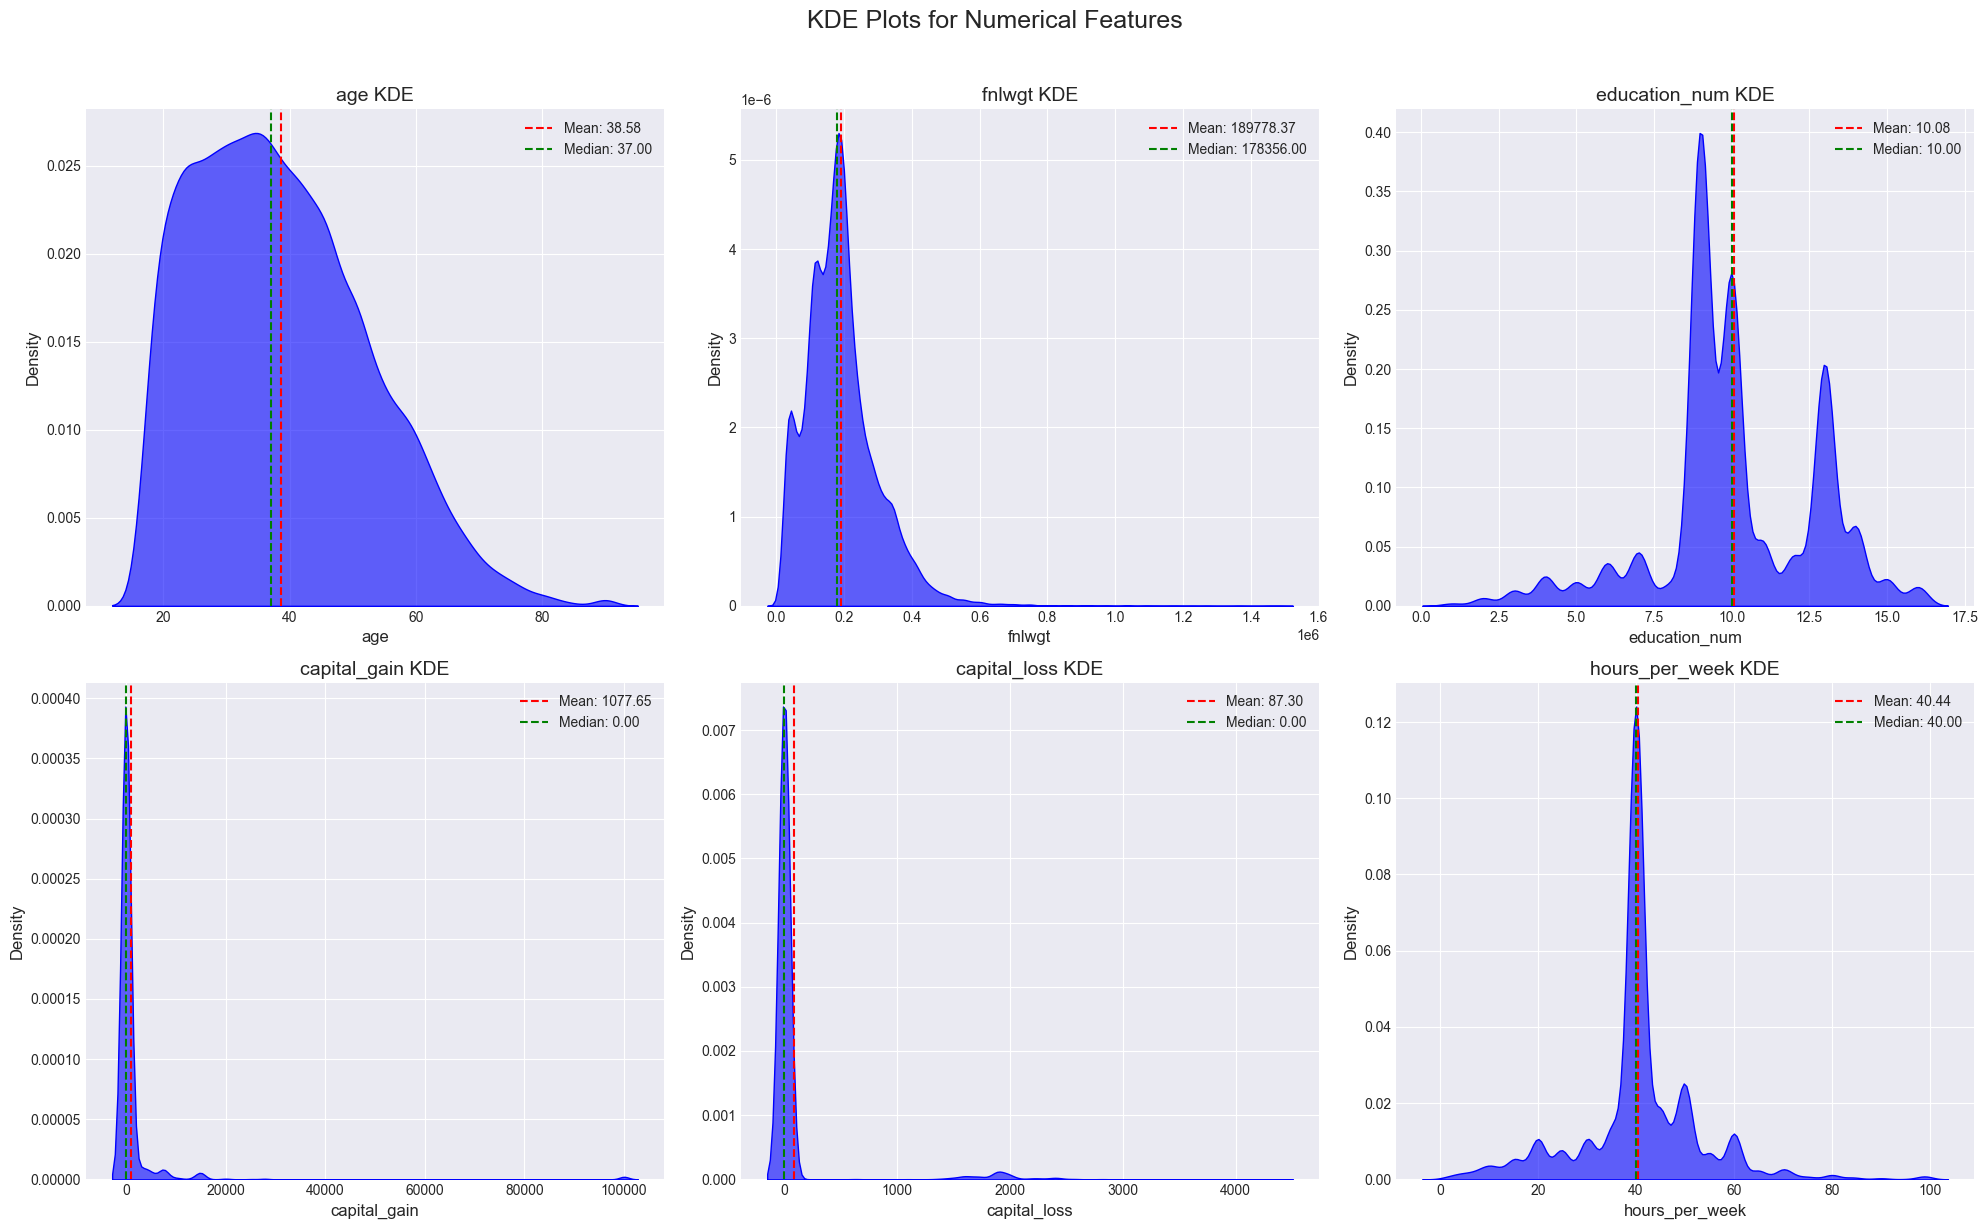

In [57]:
plot_kde(data= transformation_data, features= numerical_features)

- the capital_gain, capital_loss features are right skewed
- we will transform this features

In [58]:
def log_transform(df, columns):
    """
    Applies log transformation to specified columns of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to which the log transformation will be applied.
    columns (list): A list of column names that need to be log-transformed.
    
    Returns:
    pd.DataFrame: The DataFrame with log-transformed values for the specified columns.
    
    """
    
    # Apply log transformation to each specified column
    df_transformed = df.copy()
    for column in columns:
        df_transformed[column] = df_transformed[column].apply(lambda x: np.log(x) if x > 0 else np.nan)
    
    return df_transformed

In [59]:
transformed_columns = ['capital_gain', 'capital_loss']

In [60]:
transformation_data = log_transform(df= transformation_data,columns= transformed_columns)

In [61]:
transformation_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,7.684324,NaN,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,NaN,NaN,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,NaN,NaN,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,NaN,NaN,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,NaN,NaN,40,5,1,0,1,0


### Now ploting the features after transformation

In [62]:
def plot_kde(data, features, figsize=(20, 12)):
    """
    Plots KDE (Kernel Density Estimation) for the given numerical features before and after log transformation.

    Parameters:
        data (pd.DataFrame): The dataset containing the numerical features.
        features (list): A list of column names to plot (must be 2 features).
        figsize (tuple): Figure size for the overall plot (default is (20, 12)).

    Returns:
        None: Displays the KDE plots.
    """
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 2
    n_rows = 2  # Fixed rows for before and after plots

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('KDE Plots Before and After Log Transformation', fontsize=18, y=1.02)

    for idx, feature in enumerate(features):
        ax_before = axes[0, idx]  # First row for original
        ax_after = axes[1, idx]  # Second row for transformed

        # Plotting before transformation
        sns.kdeplot(data=data, x=feature, ax=ax_before, fill=True, color='blue', alpha=0.6)
        mean_val_before, median_val_before = data[feature].mean(), data[feature].median()
        ax_before.axvline(mean_val_before, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val_before:.2f}')
        ax_before.axvline(median_val_before, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val_before:.2f}')
        ax_before.set_title(f'{feature} - Before Transformation', fontsize=14)
        ax_before.set_xlabel(feature, fontsize=12)
        ax_before.set_ylabel('Density', fontsize=12)
        ax_before.legend(fontsize=10)

        # Log transform the feature for after plot
        transformed_feature = np.log(data[feature].replace(0, np.nan))  # Handle log(0) cases
        sns.kdeplot(data=transformed_feature, ax=ax_after, fill=True, color='purple', alpha=0.6)
        mean_val_after, median_val_after = transformed_feature.mean(), transformed_feature.median()
        ax_after.axvline(mean_val_after, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val_after:.2f}')
        ax_after.axvline(median_val_after, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val_after:.2f}')
        ax_after.set_title(f'{feature} - After Log Transformation', fontsize=14)
        ax_after.set_xlabel(f'log({feature})', fontsize=12)
        ax_after.set_ylabel('Density', fontsize=12)
        ax_after.legend(fontsize=10)

    # Remove extra subplots if any (none in this case)
    plt.tight_layout()
    plt.show()

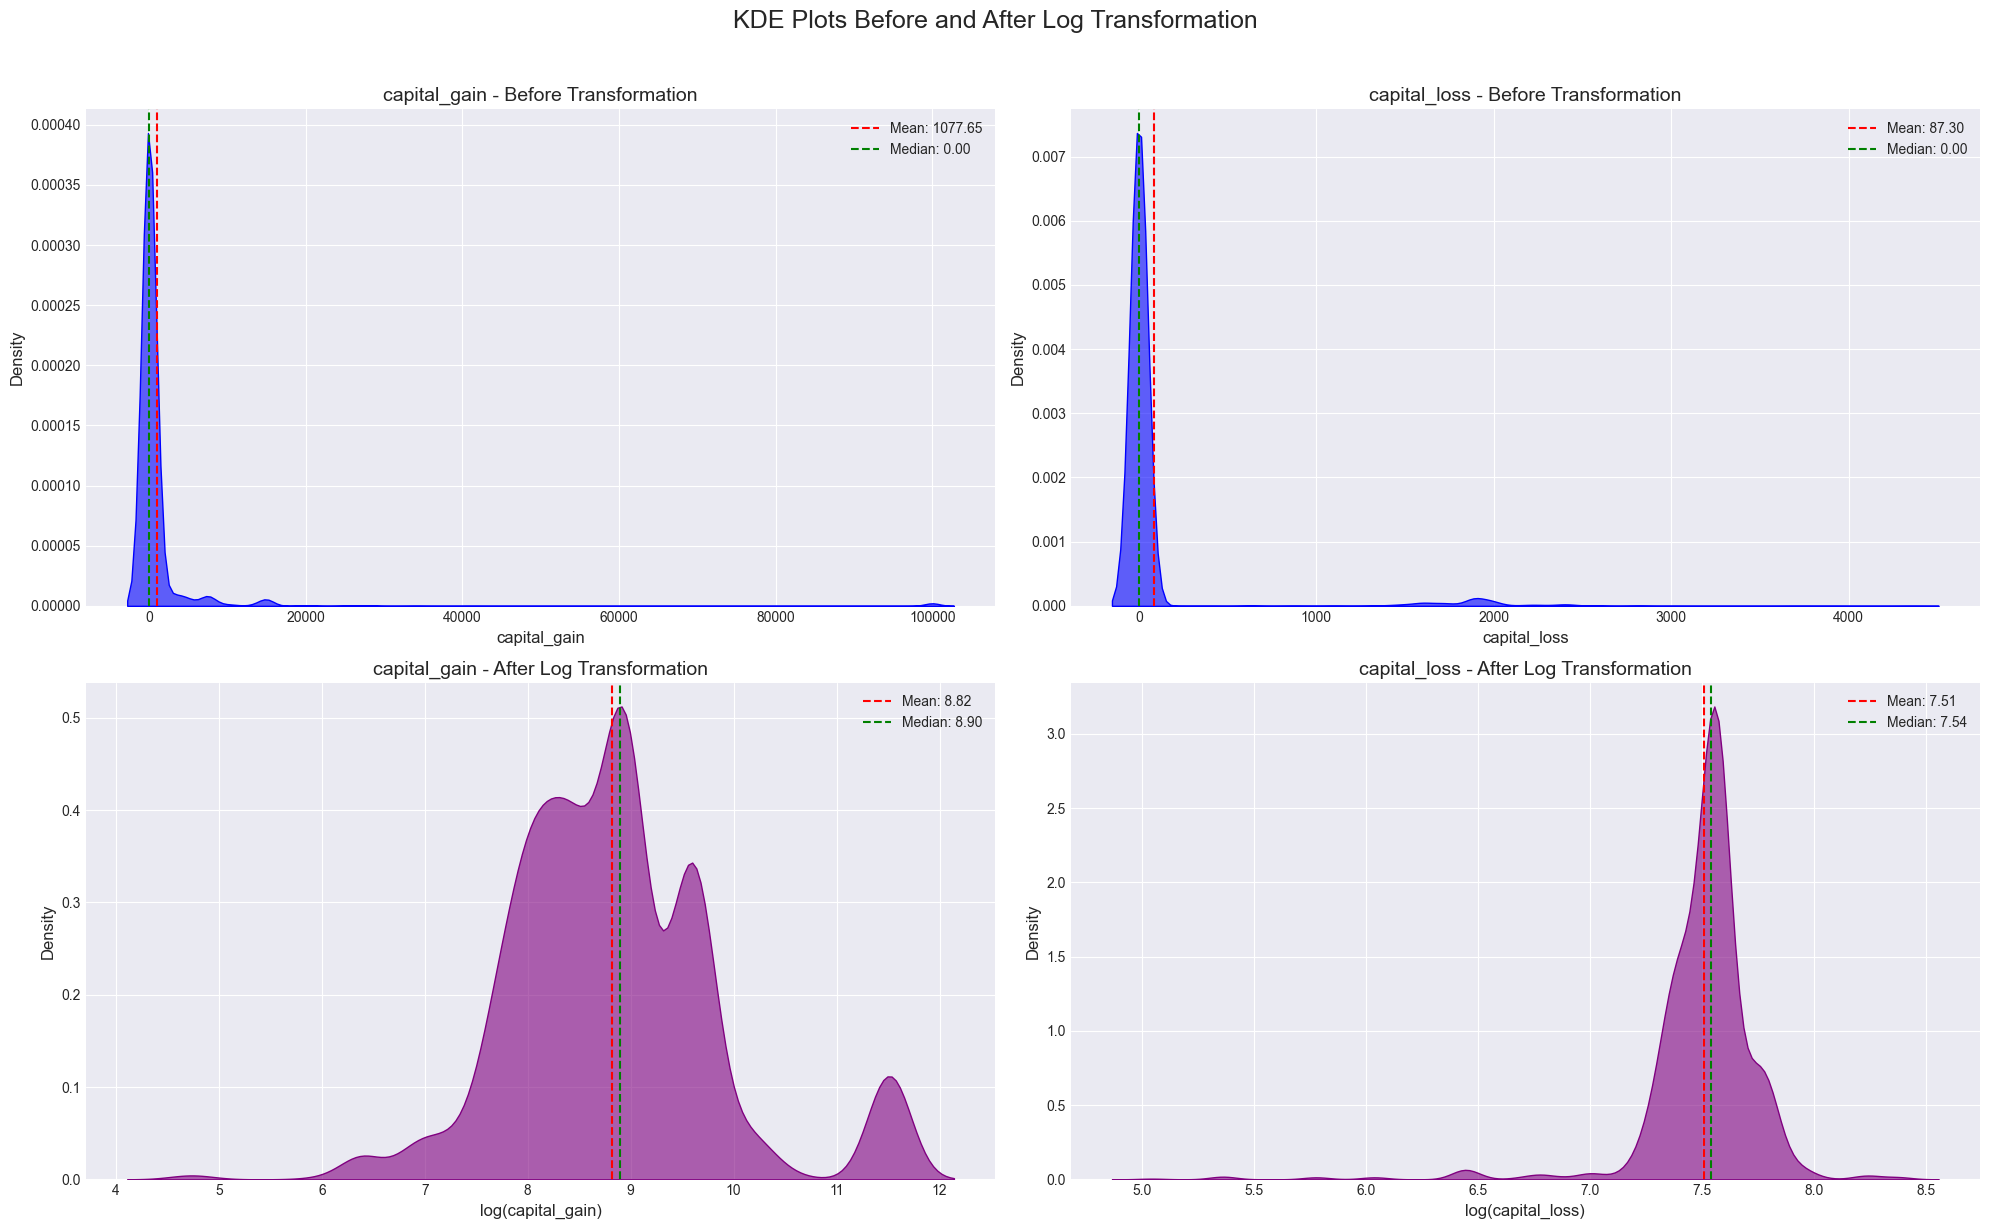

In [63]:
plot_kde(data= data, features= transformed_columns)

### Feature Selection

In [64]:
from sklearn.ensemble import IsolationForest

In [65]:
selection_data = data.copy()

In [66]:
selection_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,1,0


In [67]:
def fit_isolation_forest(data, contamination=0.2):
    """
    Fits the Isolation Forest model to detect outliers in the dataset.

    Parameters:
        data (pd.DataFrame): The dataset to fit the model on.
        contamination (float): The expected proportion of outliers in the dataset (default is 0.2).

    Returns:
        model (IsolationForest): The trained Isolation Forest model.
    """
    model = IsolationForest(contamination=contamination)
    model.fit(data)
    return model

In [68]:
def predict_outliers(model, data):
    """
    Predicts outliers using the trained Isolation Forest model.

    Parameters:
        model (IsolationForest): The trained Isolation Forest model.
        data (pd.DataFrame): The dataset to predict outliers on.

    Returns:
        outliers (array): An array with values 1 for inliers and -1 for outliers.
    """
    return model.predict(data)

In [69]:
def remove_outliers(data, outliers):
    """
    Removes the outliers from the dataset based on the predicted outlier labels.

    Parameters:
        data (pd.DataFrame): The dataset to remove outliers from.
        outliers (array): An array with values 1 for inliers and -1 for outliers.

    Returns:
        cleaned_data (pd.DataFrame): The dataset with outliers removed.
    """
    data['Outlier'] = outliers
    return data[data['Outlier'] == 1]

### Model Training

In [70]:
IsolationForest_model = fit_isolation_forest(data= selection_data[numerical_features])

In [71]:
IsolationForest_model

IsolationForest(contamination=0.2)

### Prediction

In [72]:
outliers = predict_outliers(model= IsolationForest_model,data= selection_data[numerical_features])

In [73]:
outliers

array([ 1,  1,  1, ...,  1,  1, -1], shape=(32561,))

### Removing outliers

In [74]:
df_cleaned = remove_outliers(selection_data[numerical_features], outliers)

In [75]:
print("Cleaned Data:")
df_cleaned

Cleaned Data:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Outlier
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1
...,...,...,...,...,...,...,...
32555,22,310152,10,0,0,40,1
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,1


# How Outliers Affect Model Performance

Outliers can have a significant impact on the performance of machine learning models. Here are a few ways they can affect the model:

## 1. Biasing Model Parameters
- In regression models, outliers can significantly skew the model’s predictions and affect the estimated coefficients (e.g., in Linear Regression, it can distort the line of best fit).
- In clustering algorithms like K-Means, outliers can affect the centroids, leading to incorrect clustering results.

## 2. Distortion of Predictions
- For models that rely on distance measures (like K-Nearest Neighbors, SVM, or Decision Trees), outliers can distort the distance calculations, making the predictions less reliable.

## 3. Overfitting
- Outliers may cause the model to learn patterns that do not generalize well to new data, leading to overfitting. The model may treat outliers as important data points and give them undue importance.

## 4. Increased Model Complexity
- Outliers can make the model more complex as the algorithm tries to fit extreme values, leading to unnecessary complexity and potentially poorer performance on unseen data.

## 5. Impact on Evaluation Metrics
- Outliers can lead to misleading evaluation metrics. For example, in regression tasks, metrics like Mean Squared Error (MSE) can be heavily influenced by outliers, making it seem that the model is performing worse than it actually is on typical data.

## Conclusion
- Outlier detection and removal are essential steps in the preprocessing phase of model development.
- Isolation Forest is a robust method for detecting and removing outliers, especially in high-dimensional datasets.
- Removing outliers can improve model performance by reducing bias, overfitting, and distortion in predictions.
---

## Predictive Power Score

In [77]:
! pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3-cp312-cp312-win_amd64.whl
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


  You can safely remove it manually.
  You can safely remove it manually.


In [78]:
import ppscore as pps

In [82]:
def calculate_pps(df):
    """
    Calculates the Predictive Power Score (PPS) matrix for a given DataFrame.
    
    Parameters:
        df (pd.DataFrame): The dataset for which to calculate the PPS matrix.
        
    Returns:
        pd.DataFrame: The PPS matrix for the DataFrame.
    """
    pps_matrix = pps.matrix(df)
    return pps_matrix

In [89]:
def plot_pps_heatmap(pps_matrix, features, figsize=(12, 8)):
    """
    Plots the heatmap of the Predictive Power Score (PPS) matrix.

    Parameters:
        pps_matrix (pd.DataFrame): DataFrame containing the PPS values with columns `x`, `y`, and `ppscore`.
        features (list): List of features to include in the heatmap.
        figsize (tuple): Size of the heatmap plot.

    Returns:
        None: Displays the heatmap.
    """
    # Filter the PPS matrix for the specified features
    filtered_pps = pps_matrix[
        (pps_matrix['x'].isin(features)) & (pps_matrix['y'].isin(features))
    ]
    
    # Pivot the DataFrame to prepare for the heatmap
    heatmap_data = filtered_pps.pivot(index='x', columns='y', values='ppscore')

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        linewidths=0.5
    )
    plt.title("Predictive Power Score (PPS) Matrix")
    plt.show()

In [80]:
def calculate_correlation(df):
    """
    Calculates the Pearson correlation matrix for a given DataFrame.
    
    Parameters:
        df (pd.DataFrame): The dataset for which to calculate the correlation matrix.
        
    Returns:
        pd.DataFrame: The Pearson correlation matrix for the DataFrame.
    """
    return df.corr()

In [93]:
def plot_correlation_heatmap(corr_matrix, figsize=(12, 8)):
    """
    Plots the heatmap of the Pearson correlation matrix.
    
    Parameters:
        corr_matrix (pd.DataFrame): The correlation matrix to plot.
        figsize (tuple): The size of the heatmap plot (default is (8, 6)).
        
    Returns:
        None: Displays the heatmap.
    """
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

In [84]:
pps_matrix = calculate_pps(df= data)

In [85]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7426,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7590,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,income_ >50K,native_country,0.0,regression,True,mean absolute error,2.3748,4.243662,DecisionTreeRegressor()
285,income_ >50K,sex_ Female,0.0,regression,True,mean absolute error,0.3360,0.423224,DecisionTreeRegressor()
286,income_ >50K,sex_ Male,0.0,regression,True,mean absolute error,0.3360,0.423224,DecisionTreeRegressor()
287,income_ >50K,income_ <=50K,1.0,regression,True,mean absolute error,0.2424,0.000000,DecisionTreeRegressor()


### PPS heatmap

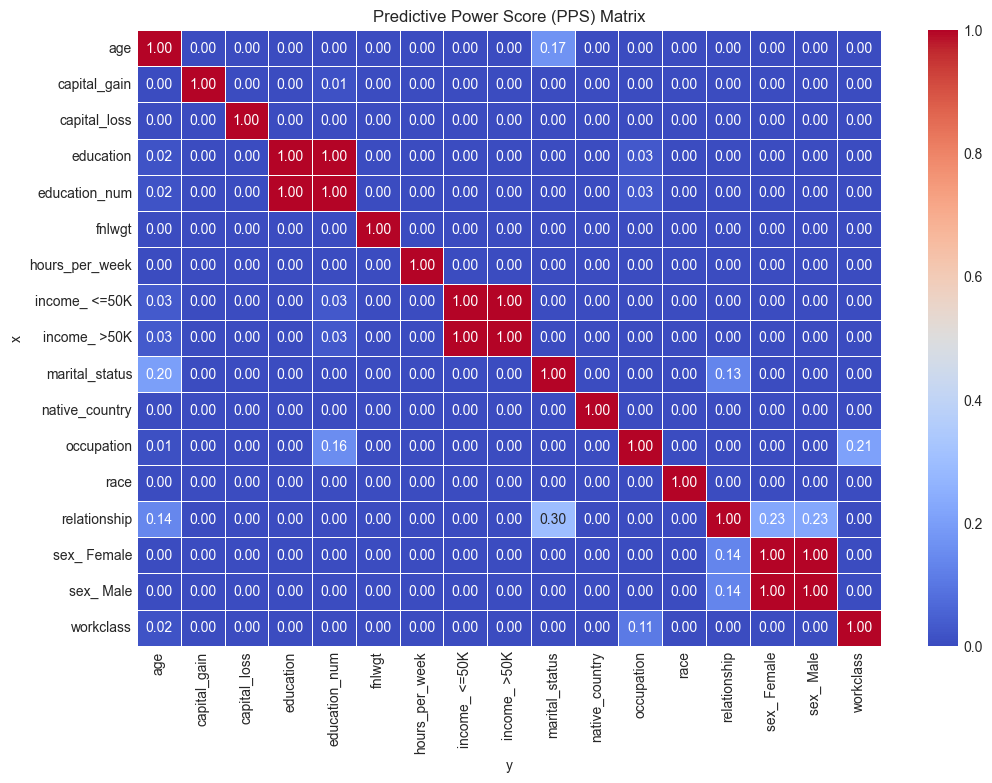

In [90]:
plot_pps_heatmap(pps_matrix= pps_matrix,features= data.columns.to_list())

### Corr heatmap

In [91]:
corr = calculate_correlation(df= data)

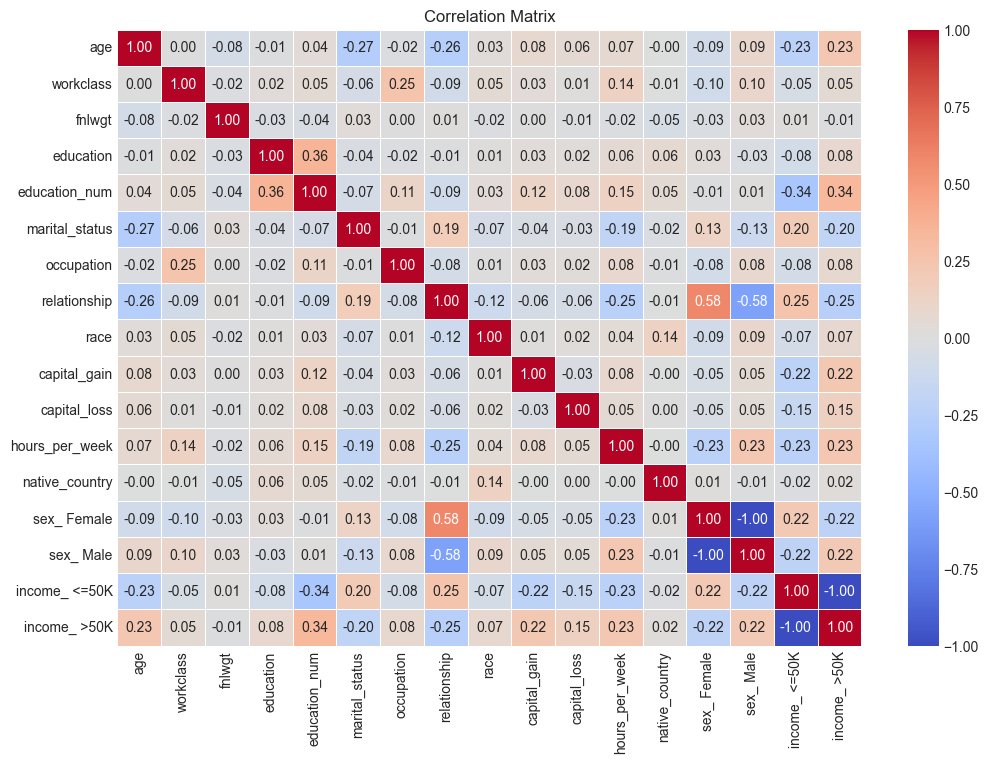

In [94]:
plot_correlation_heatmap(corr_matrix= corr)

# Comparison of Correlation Matrix and PPS Matrix

## 1. Correlation Matrix
- **Focus**: Measures the *linear relationship* between two variables.
- **Findings**:
  - **Strong Negative Correlation**:
    - `sex_Female` and `relationship` (-0.58): Suggests an inverse relationship.
    - `income_<=50K` and `education_num` (-0.34): Higher education levels are often associated with higher income brackets.
  - **Strong Positive Correlation**:
    - `education` and `education_num` (0.36): Indicates a direct mapping between these features.
    - `capital_gain` and `income_>50K` (0.22): Suggests higher income often correlates with capital gains.
  - **Weak or No Correlation**:
    - Many features, such as `native_country`, `race`, and `workclass`, show near-zero correlation with income, suggesting minimal linear relationships.

---

## 2. Predictive Power Score (PPS) Matrix
- **Focus**: Measures the *predictive power* of one variable to predict another. PPS is non-linear and asymmetric.
- **Findings**:
  - **High Predictive Power**:
    - `education_num` predicts `education` (1.0): Confirms the obvious mapping between these features.
    - `marital_status` predicts `relationship` (0.30): Indicates that marital status significantly determines the type of relationship.
    - `occupation` predicts `marital_status` (0.20): Suggests that certain occupations may correspond with specific marital statuses.
  - **Low Predictive Power**:
    - Most relationships between features, such as `race` and `income_>50K`, have near-zero PPS, suggesting that these features do not strongly predict one another.

---

## Comparison of Correlation vs. PPS

| **Aspect**          | **Correlation Matrix**                                                                 | **PPS Matrix**                                                                                   |
|----------------------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Type of Relationship** | Identifies only *linear* relationships (e.g., `education_num` and `education`).         | Captures *both linear and non-linear* relationships (e.g., `relationship` and `marital_status`). |
| **Symmetry**         | Symmetric (`corr(x, y) = corr(y, x)`).                                                 | Asymmetric (`pps(x, y)` ≠ `pps(y, x)`).                                                          |
| **Strength**         | High correlation indicates strong linear dependency.                                   | High PPS indicates strong predictive power, regardless of linearity.                             |
| **Key Insights**     | Highlights linear dependencies (e.g., `capital_gain` and `income_>50K`).               | Highlights features with predictive power (e.g., `occupation` predicting `marital_status`).      |

---

## Conclusion
- Use **Correlation Matrix** to understand linear dependencies and relationships between features.
- Use **PPS Matrix** to assess predictive power, especially for non-linear relationships or asymmetric dependencies.
- Together, they provide a comprehensive understanding of feature relationships in the dataset.
